In [79]:
import pandas as pd
sensor_selfreport = pd.read_csv("../data/clean_data/sensor_selfreported_clean.csv")
sensor_selfreport

,Unnamed: 0.1,UserID,quarter,sleep24h,PHQtot,PHQ10above,sleepAve,SLE,ssrs_wish,hours,...,IQR_actmin,IQR_mood,IQR_sleep,IQR_step,Ethnicity_rec,White,Black,Hispanic,Asian,Others
0,0,400070,1,6.0,7.0,0.0,6.0,0.0,0.0,60.0,...,20.0,6.0,206.0,3464.0,1.0,True,False,False,False,False
1,1,400070,2,5.0,10.0,1.0,6.0,0.0,0.0,6.0,...,15.2,0.0,217.2,3221.5,1.0,True,False,False,False,False
2,2,400082,1,6.0,15.0,1.0,6.0,0.0,0.0,80.0,...,30.5,7.0,205.0,4781.5,1.0,True,False,False,False,False
3,3,400082,2,8.0,7.0,0.0,7.0,0.0,0.0,40.0,...,15.0,5.5,192.5,0.0,1.0,True,False,False,False,False
4,4,400199,1,3.0,5.0,0.0,7.0,1.0,0.0,84.0,...,62.5,6.0,0.0,4908.0,1.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7729,7959,599957,2,6.0,9.0,0.0,6.0,1.0,0.0,72.0,...,0.0,6.0,0.0,4675.0,4.0,False,False,False,True,False
7730,7960,599972,1,7.0,11.0,1.0,6.0,0.0,0.0,85.0,...,35.5,0.0,76.0,3425.5,4.0,False,False,False,True,False
7731,7961,599972,2,6.5,11.0,1.0,6.0,0.0,0.0,78.5,...,54.0,1.0,75.2,3366.8,4.0,False,False,False,True,False
7732,7962,599972,3,7.0,7.0,0.0,6.8,0.0,0.0,72.0,...,106.0,2.0,108.0,3938.5,4.0,False,False,False,True,False


In [80]:
# Define the original and improved column names
data = {
    "Original Name": [
        "Sex", "Child", "White", "Black", "Hispanic", "Asian", "depr0", "deprTreat0",
        "PHQ10above", "error1", "SLE", "Marital", "rotation", "Age", "Neu0", "EFE0",
        "PHQtot", "hours", "daysoff", "sleepAve", "mean_sleep", "mean_mood", "mean_step", "sd_mood", "ssrs_wish"
    ],
    "Improved Label": [
        "Sex", "Has Children", "White Race", "Black Race", "Hispanic Ethnicity",
        "Asian Race", "Past Depression", "Past Depression Treatment", "PHQ >=10", "Medical Error",
        "Significant Life Events", "Marital Status", "Rotation Setting", "Age", "Neuroticism",
        "Adverse Experiences", "PHQ Total", "Work Hours", "Days Off", "Reported Sleep", "Sensor Sleep",
        "Mean Mood", "Mean Steps", "Mood Variability", "Suicide_Risk"
    ]
}

# Create a dictionary to map original names to improved labels
rename_dict = dict(zip(data["Original Name"], data["Improved Label"]))

# Rename the columns in the dataframe `sensor_selfreport`
sensor_selfreport.rename(columns=rename_dict, inplace=True)

# Display the updated column names to confirm the renaming
sensor_selfreport.columns

Index(['Unnamed: 0.1', 'UserID', 'quarter', 'sleep24h', 'PHQ Total',
       'PHQ >=10', 'Reported Sleep', 'Significant Life Events', 'Suicide_Risk',
       'Work Hours', 'Rotation Setting', 'Days Off', 'Medical Error', 'Year',
       'Age', 'Sex', 'Marital Status', 'Has Children', 'SigOther0',
       'Ethnicity', 'Neuroticism', 'Adverse Experiences', 'Past Depression',
       'Past Depression Treatment', 'specTreat0_Medication',
       'specTreat0_Psychotherapy', 'specTreat0_Other', 'specTreat0_Other_TEXT',
       'Unnamed: 0', 'Year_sensor', 'n_sensordays_actmin', 'n_sensordays_mood',
       'n_sensordays_sleep', 'n_sensordays_step', 'mean_actmin', 'Mean Mood',
       'Sensor Sleep', 'Mean Steps', 'sd_actmin', 'Mood Variability',
       'sd_sleep', 'sd_step', 'se_actmin', 'se_mood', 'se_sleep', 'se_step',
       'median_actmin', 'median_mood', 'median_sleep', 'median_step',
       'IQR_actmin', 'IQR_mood', 'IQR_sleep', 'IQR_step', 'Ethnicity_rec',
       'White Race', 'Black Race', 'H

# Analysis with all the DATA + Sensor Sleep

In [81]:
# # Check for NaN values in the variable 'ssrs_wish' within the dataset 'sensor_selfreport'
# nan_check = sensor_selfreport.isna().sum()
# nan_check

In [82]:
sensor_selfreport.columns

Index(['Unnamed: 0.1', 'UserID', 'quarter', 'sleep24h', 'PHQ Total',
       'PHQ >=10', 'Reported Sleep', 'Significant Life Events', 'Suicide_Risk',
       'Work Hours', 'Rotation Setting', 'Days Off', 'Medical Error', 'Year',
       'Age', 'Sex', 'Marital Status', 'Has Children', 'SigOther0',
       'Ethnicity', 'Neuroticism', 'Adverse Experiences', 'Past Depression',
       'Past Depression Treatment', 'specTreat0_Medication',
       'specTreat0_Psychotherapy', 'specTreat0_Other', 'specTreat0_Other_TEXT',
       'Unnamed: 0', 'Year_sensor', 'n_sensordays_actmin', 'n_sensordays_mood',
       'n_sensordays_sleep', 'n_sensordays_step', 'mean_actmin', 'Mean Mood',
       'Sensor Sleep', 'Mean Steps', 'sd_actmin', 'Mood Variability',
       'sd_sleep', 'sd_step', 'se_actmin', 'se_mood', 'se_sleep', 'se_step',
       'median_actmin', 'median_mood', 'median_sleep', 'median_step',
       'IQR_actmin', 'IQR_mood', 'IQR_sleep', 'IQR_step', 'Ethnicity_rec',
       'White Race', 'Black Race', 'H

Best alpha selected by cross-validation: 0.002


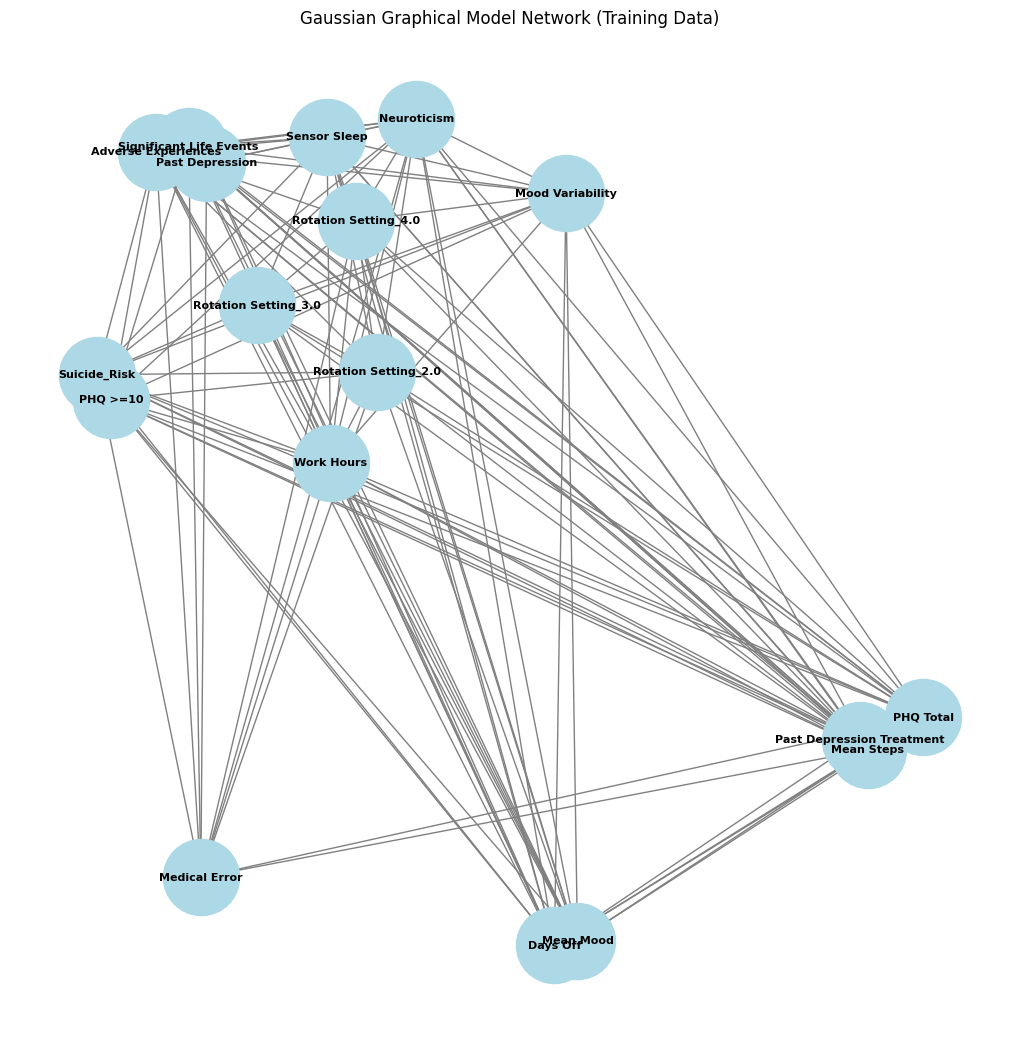

Features connected to 'Suicide_Risk' in the GGM: ['Past Depression Treatment', 'PHQ >=10', 'Medical Error', 'Rotation Setting_2.0', 'Rotation Setting_3.0', 'Neuroticism', 'Adverse Experiences', 'PHQ Total', 'Work Hours', 'Days Off', 'Sensor Sleep', 'Mean Steps', 'Mood Variability']
R^2 for the test set: 0.16
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1080
         1.0       0.53      0.35      0.42       104

    accuracy                           0.92      1184
   macro avg       0.73      0.66      0.69      1184
weighted avg       0.90      0.92      0.91      1184

Confusion Matrix:
[[1048   32]
 [  68   36]]


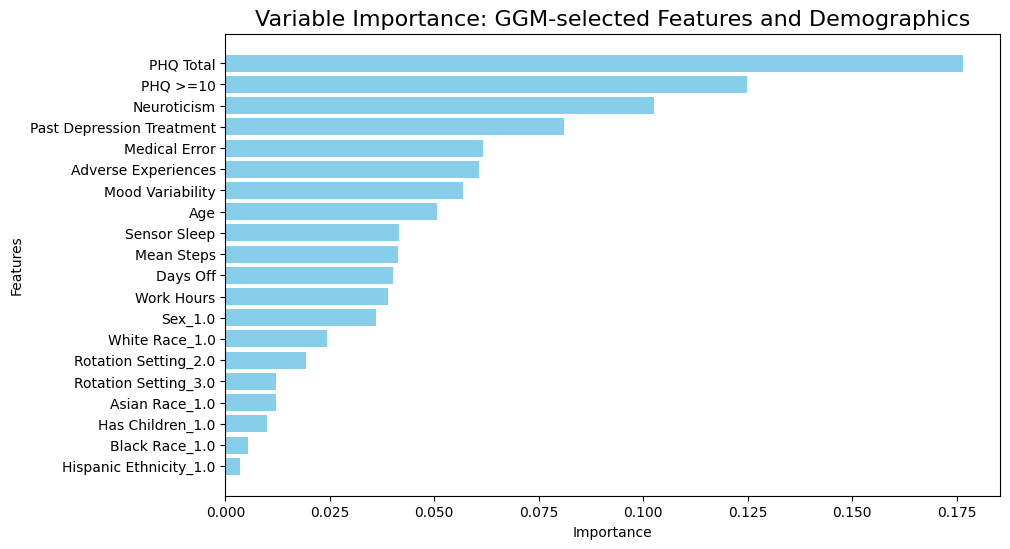

In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.covariance import GraphicalLassoCV
from imblearn.over_sampling import SMOTE
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score

# Define variable groups
# demo_vars = ['Sex', 'Child', "White", "Black", "Hispanic", "Asian"]
# dummy_vars = ['depr0', 'deprTreat0', 'PHQ10above', 'error1', 'SLE']
# categorical_vars = ['Marital', 'rotation']
# continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 'mean_sleep', 'mean_mood', "mean_step", "sd_mood"]
# Updated variables lists with consistent and meaningful labels

demo_vars = ['Sex', 'Has Children', 'White Race', 'Black Race', 'Hispanic Ethnicity', 'Asian Race']
dummy_vars = ['Past Depression', 'Past Depression Treatment', 'PHQ >=10', 'Medical Error', 'Significant Life Events']
categorical_vars = ['Marital Status', 'Rotation Setting']
continuous_vars = ['Age', 'Neuroticism', 'Adverse Experiences', 'PHQ Total', 'Work Hours',
                   'Days Off', 'Sensor Sleep', 'Mean Mood', 'Mean Steps', 'Mood Variability']


# Step 1: Preprocess the entire dataset
# Impute missing values for all variables including demographics
imputer = SimpleImputer(strategy='most_frequent')
all_categorical = demo_vars + dummy_vars + categorical_vars
sensor_selfreport[all_categorical] = imputer.fit_transform(sensor_selfreport[all_categorical])
sensor_selfreport[continuous_vars] = imputer.fit_transform(sensor_selfreport[continuous_vars])

# One-hot encode non-dummy categorical variables (including demographics)
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
categorical_to_encode = categorical_vars + [var for var in demo_vars if var not in dummy_vars]
categorical_encoded = encoder.fit_transform(sensor_selfreport[categorical_to_encode])
categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_to_encode))

# Standardize continuous variables
scaler = StandardScaler()
continuous_scaled = scaler.fit_transform(sensor_selfreport[continuous_vars])
continuous_scaled = pd.DataFrame(continuous_scaled, columns=continuous_vars)

# Create two datasets: one for GGM (without demo vars) and one complete dataset
# Dataset for GGM
ggm_data = pd.concat([
    sensor_selfreport[dummy_vars],
    categorical_encoded.drop(columns=[
        col for col in categorical_encoded.columns if any(demo in col for demo in demo_vars)
        or 'Marital' in col]),
    continuous_scaled.drop(columns=['Age'])
], axis=1)
ggm_data['Suicide_Risk'] = sensor_selfreport['Suicide_Risk']
ggm_data['quarter'] = sensor_selfreport['quarter']

# Complete dataset (including demo vars)
complete_data = pd.concat([
    sensor_selfreport[dummy_vars],
    categorical_encoded,
    continuous_scaled
], axis=1)
complete_data['Suicide_Risk'] = sensor_selfreport['Suicide_Risk']
complete_data['quarter'] = sensor_selfreport['quarter']

# Remove rows with missing target variable
ggm_data = ggm_data.dropna(subset=["Suicide_Risk"])
complete_data = complete_data.dropna(subset=["Suicide_Risk"])

# Step 2: Split data into training and testing sets
train_ggm = ggm_data[ggm_data['quarter'].isin([1, 2, 3])].drop(columns=['quarter'])
test_ggm = ggm_data[ggm_data['quarter'] == 4].drop(columns=['quarter'])

train_complete = complete_data[complete_data['quarter'].isin([1, 2, 3])].drop(columns=['quarter'])
test_complete = complete_data[complete_data['quarter'] == 4].drop(columns=['quarter'])

# Step 3: Run Gaussian Graphical Model (GGM) on training data (excluding demo vars)
glasso = GraphicalLassoCV()
glasso.fit(train_ggm)
best_alpha = glasso.alpha_
precision_matrix = glasso.precision_
print(f"Best alpha selected by cross-validation: {best_alpha:.3f}")

# Step 4: Build and Visualize the GGM Network
G = nx.Graph()
for i, col1 in enumerate(train_ggm.columns):
    for j, col2 in enumerate(train_ggm.columns):
        if i != j and precision_matrix[i, j] != 0:
            G.add_edge(col1, col2, weight=precision_matrix[i, j])

# Visualize the GGM network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_size=3000, font_size=8, font_weight='bold',
    node_color='lightblue', edge_color='gray'
)
plt.title("Gaussian Graphical Model Network (Training Data)")
plt.savefig('ggm_training_network_SENSORSLEEP.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 5: Feature Selection
if 'Suicide_Risk' in G.nodes:
    ggm_selected_features = [n for n in G.neighbors('Suicide_Risk')]
    print("Features connected to 'Suicide_Risk' in the GGM:", ggm_selected_features)
else:
    raise ValueError("Error: 'Suicide_Risk' is not part of the GGM network.")

# Get demographic columns from complete dataset
demo_columns = [col for col in train_complete.columns if any(demo in col for demo in demo_vars)]

# Combine GGM-selected features with demographic variables
final_features = ggm_selected_features + demo_columns + ["Age"]

# Step 6: Prepare Final Dataset for Modeling
X_train = train_complete[final_features]
y_train = train_complete['Suicide_Risk']
X_test = test_complete[final_features]
y_test = test_complete['Suicide_Risk']

# Step 7: Balance the Training Data with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 8: Train Random Forest Model
clf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced_subsample',
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=200
)

clf.fit(X_train_resampled, y_train_resampled)

# Step 9: Evaluate the Model
y_prob = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

# Compute R^2
r2 = r2_score(y_test, y_prob)
print(f"R^2 for the test set: {r2:.2f}")

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 10: Plot Variable Importance
importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Variable Importance: GGM-selected Features and Demographics', fontsize=16)
plt.gca().invert_yaxis()
plt.savefig('variable_importance_SENSORSLEEP.png', dpi=300, bbox_inches='tight')
plt.show()

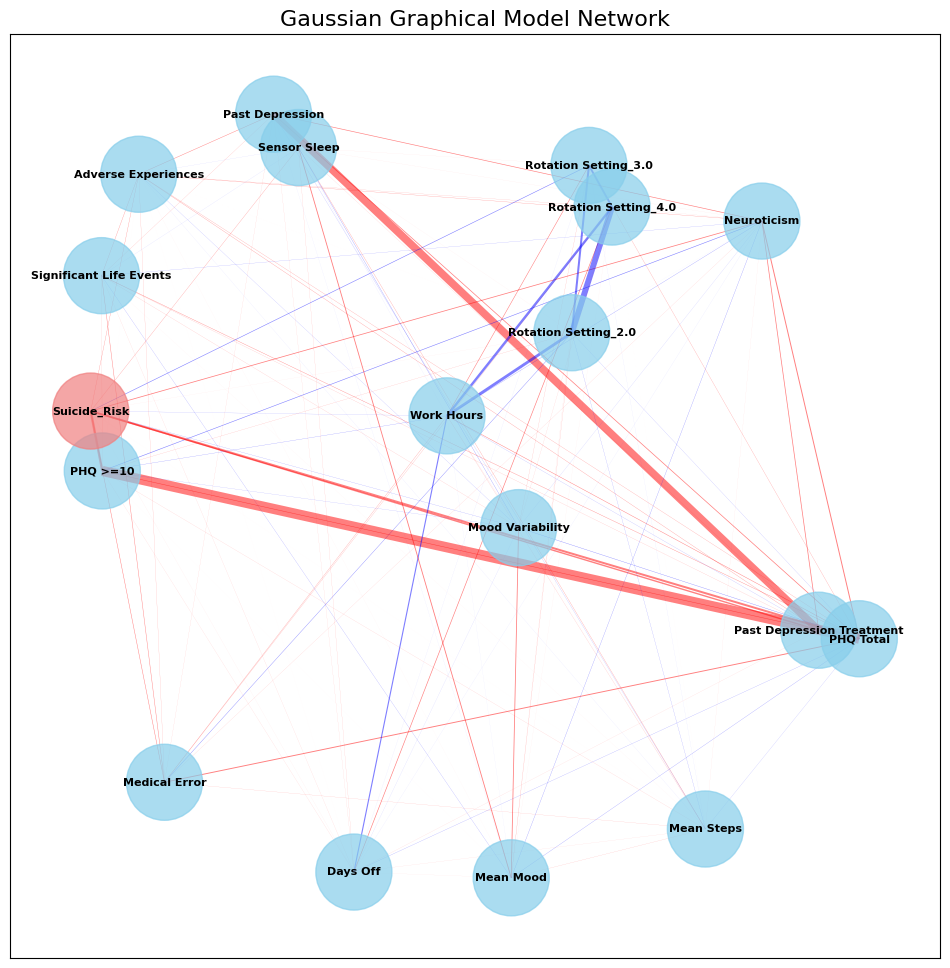

In [88]:
# Step 3: Build and visualize the GGM network with compact layout
G = nx.Graph()

# Add nodes and edges with weights
for i, col1 in enumerate(train_ggm.columns):  # Use train_ggm instead of train_data
    for j, col2 in enumerate(train_ggm.columns):
        if i != j and precision_matrix[i, j] != 0:
            G.add_edge(col1, col2, weight=precision_matrix[i, j])

# Enhanced visualization settings for a compact layout
plt.figure(figsize=(12, 12))

# Use a spring layout with adjusted parameters for compactness
pos = nx.spring_layout(G, seed=42, k=0.8, iterations=50)

# Color nodes by type (e.g., target vs predictors)
node_colors = ['lightcoral' if node == 'Suicide_Risk' else 'skyblue' for node in G.nodes()]

# Get edge weights for display (but won't plot the numbers)
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes
nx.draw_networkx_nodes(
    G, pos, node_color=node_colors, node_size=3000, alpha=0.7
)

# Draw edges with varying transparency based on weight
nx.draw_networkx_edges(
    G, pos, 
    width=[1.5 * abs(w) for w in edge_weights],
    edge_color=['blue' if w > 0 else 'red' for w in edge_weights],
    alpha=0.5
)

# Add node labels (but no edge labels)
nx.draw_networkx_labels(
    G, pos, font_size=8, font_weight='bold', font_color='black'
)

# Title and save
plt.title("Gaussian Graphical Model Network", fontsize=16)
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\compact_network_no_numbers.png'
plt.savefig('ggm_training_network_weighted_SENSORSLEEP', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()

Features connected to 'Suicide_Risk': ['Past Depression Treatment', 'PHQ >=10', 'Medical Error', 'Rotation Setting_2.0', 'Rotation Setting_3.0', 'Neuroticism', 'Adverse Experiences', 'PHQ Total', 'Work Hours', 'Days Off', 'Sensor Sleep', 'Mean Steps', 'Mood Variability']


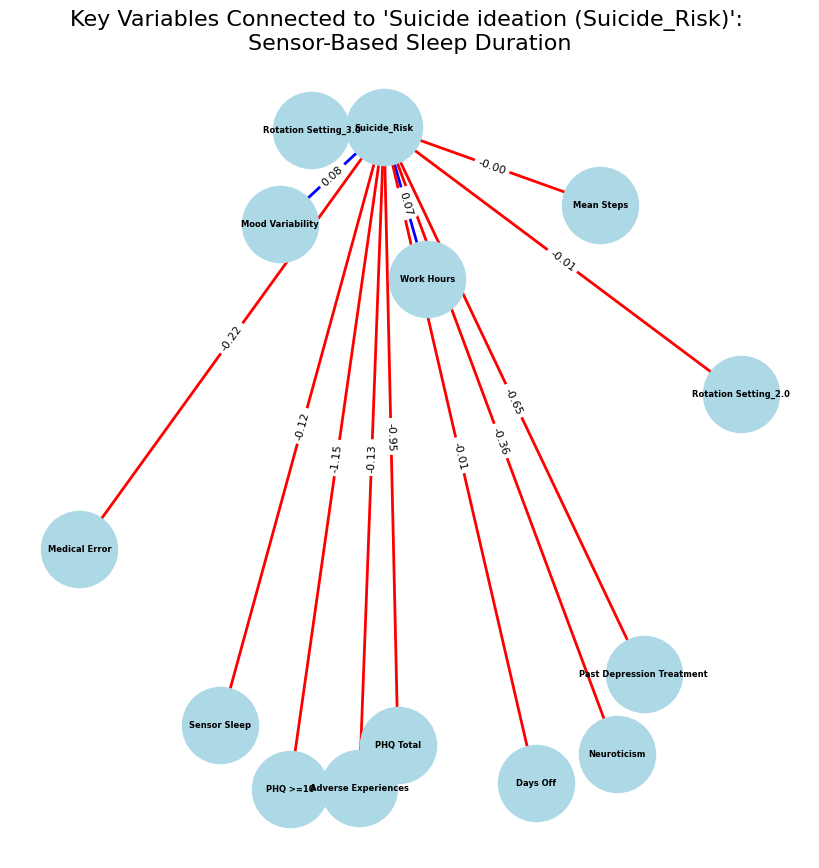

In [89]:
# Step 4: Identify features directly connected to the outcome variable 'Suicide_Risk'
if 'Suicide_Risk' in G.nodes:
    connected_features = [n for n in G.neighbors('Suicide_Risk')]
    print(f"Features connected to 'Suicide_Risk': {connected_features}")
else:
    print("Error: 'Suicide_Risk' is not part of the GGM network.")

# Step 5: Build a subgraph with only 'Suicide_Risk' and its connected nodes
subgraph = nx.Graph()
subgraph.add_node('Suicide_Risk')  # Add the main outcome variable

# Add edges between 'Suicide_Risk' and connected features with weights
for feature in connected_features:
    if G.has_edge('Suicide_Risk', feature):  # Ensure the edge exists
        weight = G['Suicide_Risk'][feature]['weight']  # Get the edge weight
        subgraph.add_edge('Suicide_Risk', feature, weight=weight)  # Add edge

# Step 6: Prepare edge colors based on the sign of the weight
edge_colors = []
for _, _, weight in subgraph.edges(data='weight'):
    if weight > 0:
        edge_colors.append('blue')  # Positive correlations
    else:
        edge_colors.append('red')  # Negative correlations

# Step 7: Visualize the subgraph with color-coded edges
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgraph, seed=42)  # Layout for visualization
nx.draw(
    subgraph, pos, with_labels=True, node_size=3000, font_size=6, font_weight='bold',
    node_color='lightblue', edge_color=edge_colors, width=2
)

# Add edge labels for weights
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(
    subgraph, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()}, font_size=8
)

# Title and save
plt.title("Key Variables Connected to 'Suicide ideation (Suicide_Risk)': \nSensor-Based Sleep Duration", fontsize = 16)
output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\sub_graph_Suicide_Risk.png'
plt.savefig('output_path_SENSORSLEEP.png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()


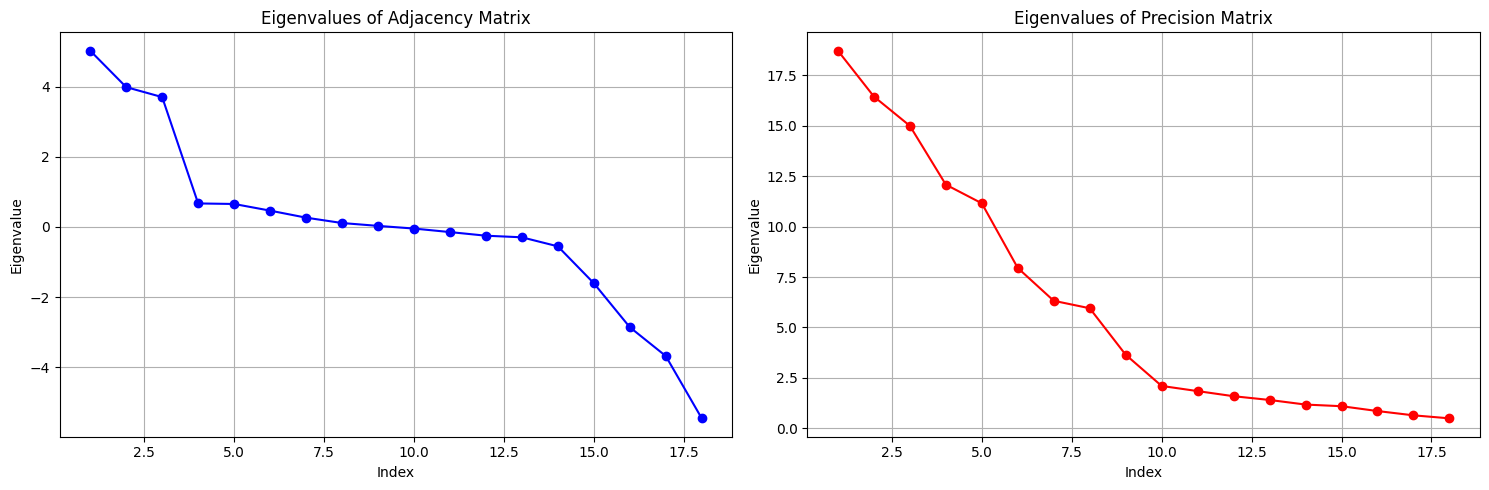


Network Eigenvalue Analysis:
Adjacency Matrix:
  - Largest eigenvalue: 5.0217
  - Smallest eigenvalue: -5.4562
  - Spectral gap: 1.0377

Precision Matrix:
  - Largest eigenvalue: 18.7175
  - Smallest eigenvalue: 0.4945
  - Condition number: 37.8502


In [90]:
# [Previous imports remain the same]
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.covariance import GraphicalLassoCV
from imblearn.over_sampling import SMOTE
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from scipy import linalg

# [Previous code remains the same until after creating the GGM network]

# After creating the GGM network (after Step 4), add:

# Step 4b: Calculate and analyze eigenvalues
def analyze_network_eigenvalues(G, precision_matrix):
    # Get adjacency matrix
    A = nx.adjacency_matrix(G).todense()
    
    # Calculate eigenvalues of adjacency matrix
    adj_eigenvalues = np.linalg.eigvals(A)
    
    # Calculate eigenvalues of precision matrix
    prec_eigenvalues = np.linalg.eigvals(precision_matrix)
    
    # Sort eigenvalues in descending order
    adj_eigenvalues = sorted(adj_eigenvalues.real, reverse=True)
    prec_eigenvalues = sorted(prec_eigenvalues.real, reverse=True)
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot eigenvalues of adjacency matrix
    ax1.plot(range(1, len(adj_eigenvalues) + 1), adj_eigenvalues, 'bo-')
    ax1.set_title('Eigenvalues of Adjacency Matrix')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Eigenvalue')
    ax1.grid(True)
    
    # Plot eigenvalues of precision matrix
    ax2.plot(range(1, len(prec_eigenvalues) + 1), prec_eigenvalues, 'ro-')
    ax2.set_title('Eigenvalues of Precision Matrix')
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Eigenvalue')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('network_eigenvalues_SENSORSLEEP.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Calculate and return network metrics
    metrics = {
        'adj_largest_eigenvalue': adj_eigenvalues[0],
        'adj_smallest_eigenvalue': adj_eigenvalues[-1],
        'adj_spectral_gap': adj_eigenvalues[0] - adj_eigenvalues[1],
        'prec_largest_eigenvalue': prec_eigenvalues[0],
        'prec_smallest_eigenvalue': prec_eigenvalues[-1],
        'prec_condition_number': prec_eigenvalues[0] / prec_eigenvalues[-1] if prec_eigenvalues[-1] != 0 else float('inf')
    }
    
    return metrics

# Calculate and print network metrics
network_metrics = analyze_network_eigenvalues(G, precision_matrix)

# Print the results
print("\nNetwork Eigenvalue Analysis:")
print(f"Adjacency Matrix:")
print(f"  - Largest eigenvalue: {network_metrics['adj_largest_eigenvalue']:.4f}")
print(f"  - Smallest eigenvalue: {network_metrics['adj_smallest_eigenvalue']:.4f}")
print(f"  - Spectral gap: {network_metrics['adj_spectral_gap']:.4f}")
print("\nPrecision Matrix:")
print(f"  - Largest eigenvalue: {network_metrics['prec_largest_eigenvalue']:.4f}")
print(f"  - Smallest eigenvalue: {network_metrics['prec_smallest_eigenvalue']:.4f}")
print(f"  - Condition number: {network_metrics['prec_condition_number']:.4f}")

# [Rest of the previous code remains the same]

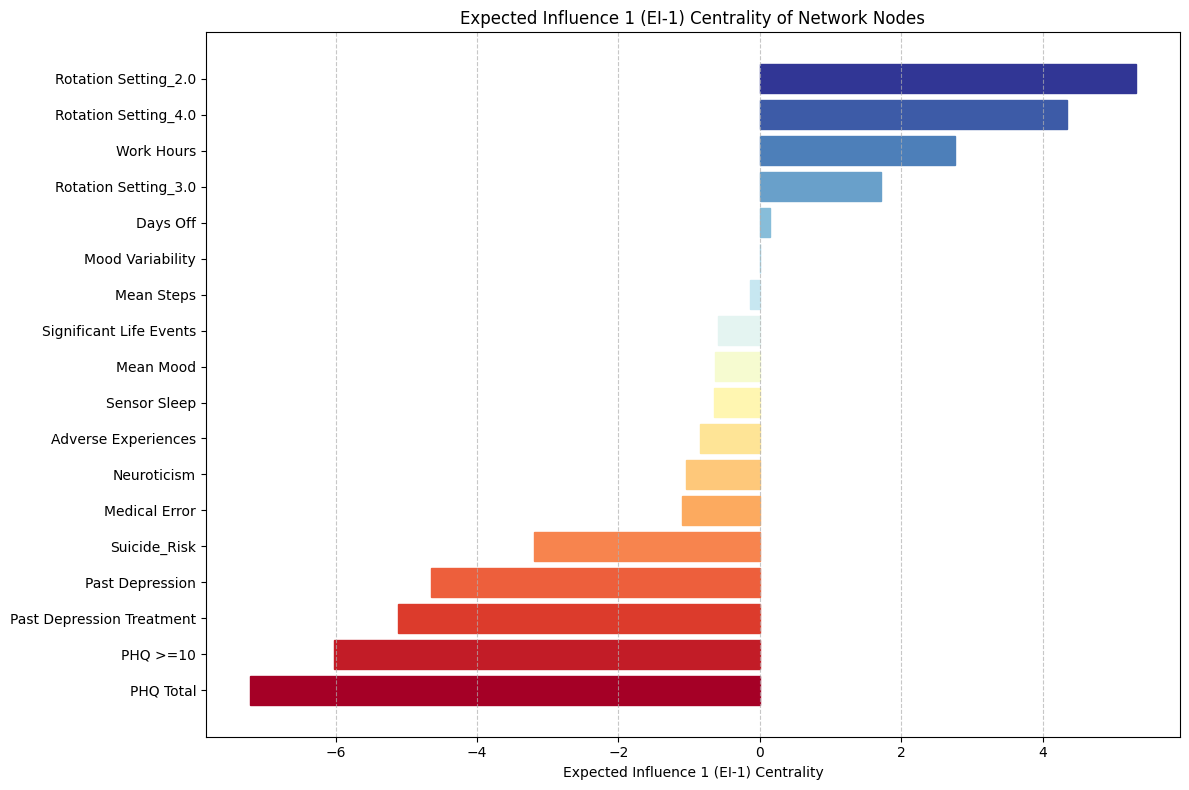


Expected Influence 1 (EI-1) Centrality Scores:
                              EI1
PHQ Total                 -7.2081
PHQ >=10                  -6.0203
Past Depression Treatment -5.1212
Past Depression           -4.6540
Suicide_Risk              -3.1888
Medical Error             -1.1053
Neuroticism               -1.0429
Adverse Experiences       -0.8541
Sensor Sleep              -0.6556
Mean Mood                 -0.6306
Significant Life Events   -0.5944
Mean Steps                -0.1401
Mood Variability          -0.0009
Days Off                   0.1413
Rotation Setting_3.0       1.7179
Work Hours                 2.7619
Rotation Setting_4.0       4.3449
Rotation Setting_2.0       5.3130


In [91]:
# [Previous imports remain the same]
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.covariance import GraphicalLassoCV
from imblearn.over_sampling import SMOTE
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score
import seaborn as sns

# [Previous code remains the same until after creating the GGM network]

# Add after creating the GGM network (after Step 4):

def calculate_ei1_centrality(G):
    """
    Calculate Expected Influence 1 (EI-1) Centrality for each node in the network.
    EI-1 is the sum of edge weights (including negative weights) connected to each node.
    """
    ei1_centrality = {}
    for node in G.nodes():
        # Sum all edge weights (both positive and negative) for the node
        ei1 = sum(w['weight'] for _, _, w in G.edges(node, data=True))
        ei1_centrality[node] = ei1
    return ei1_centrality

# Calculate EI-1 centrality
ei1_scores = calculate_ei1_centrality(G)

# Convert to DataFrame for easier handling
ei1_df = pd.DataFrame.from_dict(ei1_scores, orient='index', columns=['EI1'])
ei1_df.sort_values('EI1', ascending=True, inplace=True)

# Create visualization
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(ei1_df)), ei1_df['EI1'])
plt.yticks(range(len(ei1_df)), ei1_df.index)
plt.xlabel('Expected Influence 1 (EI-1) Centrality')
plt.title('Expected Influence 1 (EI-1) Centrality of Network Nodes')

# Add color gradient to bars
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('ei1_centrality_SENSORSLEEP.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the EI-1 scores
print("\nExpected Influence 1 (EI-1) Centrality Scores:")
print(ei1_df.round(4))


# Analysis with all the DATA + Self Reported Sleep

Best alpha selected by cross-validation: 0.002


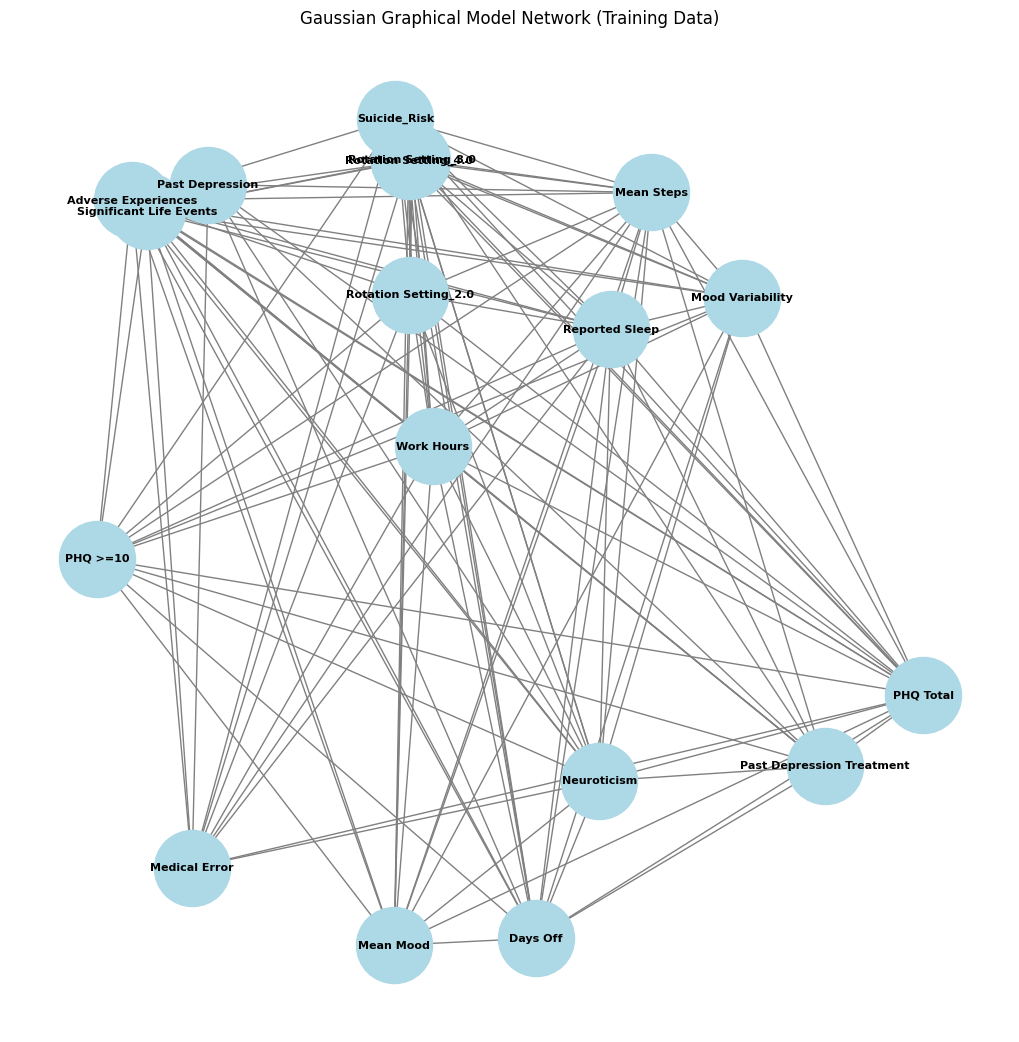

Features connected to 'Suicide_Risk' in the GGM: ['Past Depression Treatment', 'PHQ >=10', 'Medical Error', 'Rotation Setting_2.0', 'Rotation Setting_3.0', 'Neuroticism', 'Adverse Experiences', 'PHQ Total', 'Work Hours', 'Days Off', 'Reported Sleep', 'Mean Steps', 'Mood Variability']
R^2 for the test set: 0.16
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1080
         1.0       0.51      0.36      0.42       104

    accuracy                           0.91      1184
   macro avg       0.72      0.66      0.69      1184
weighted avg       0.90      0.91      0.91      1184

Confusion Matrix:
[[1044   36]
 [  67   37]]


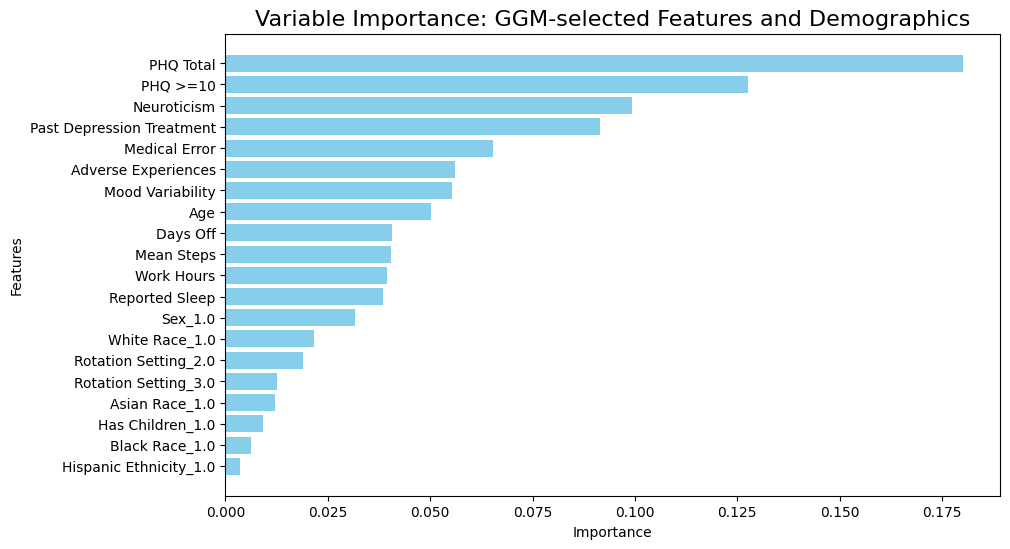

In [92]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.covariance import GraphicalLassoCV
from imblearn.over_sampling import SMOTE
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score

# Define variable groups
# demo_vars = ['Sex', 'Child', "White", "Black", "Hispanic", "Asian"]
# dummy_vars = ['depr0', 'deprTreat0', 'PHQ10above', 'error1', 'SLE']
# categorical_vars = ['Marital', 'rotation']
# continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 'sleepAve', 'mean_mood', "mean_step", "sd_mood"]
demo_vars = ['Sex', 'Has Children', 'White Race', 'Black Race', 'Hispanic Ethnicity', 'Asian Race']
dummy_vars = ['Past Depression', 'Past Depression Treatment', 'PHQ >=10', 'Medical Error', 'Significant Life Events']
categorical_vars = ['Marital Status', 'Rotation Setting']
continuous_vars = ['Age', 'Neuroticism', 'Adverse Experiences', 'PHQ Total', 'Work Hours',
                   'Days Off', 'Reported Sleep', 'Mean Mood', 'Mean Steps', 'Mood Variability']

# Step 1: Preprocess the entire dataset
# Impute missing values for all variables including demographics
imputer = SimpleImputer(strategy='most_frequent')
all_categorical = demo_vars + dummy_vars + categorical_vars
sensor_selfreport[all_categorical] = imputer.fit_transform(sensor_selfreport[all_categorical])
sensor_selfreport[continuous_vars] = imputer.fit_transform(sensor_selfreport[continuous_vars])

# One-hot encode non-dummy categorical variables (including demographics)
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
categorical_to_encode = categorical_vars + [var for var in demo_vars if var not in dummy_vars]
categorical_encoded = encoder.fit_transform(sensor_selfreport[categorical_to_encode])
categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_to_encode))

# Standardize continuous variables
scaler = StandardScaler()
continuous_scaled = scaler.fit_transform(sensor_selfreport[continuous_vars])
continuous_scaled = pd.DataFrame(continuous_scaled, columns=continuous_vars)

# Create two datasets: one for GGM (without demo vars) and one complete dataset
# Dataset for GGM
ggm_data = pd.concat([
    sensor_selfreport[dummy_vars],
    categorical_encoded.drop(columns=[
        col for col in categorical_encoded.columns if any(demo in col for demo in demo_vars)
        or 'Marital' in col]),
    continuous_scaled.drop(columns=['Age'])
], axis=1)
ggm_data['Suicide_Risk'] = sensor_selfreport['Suicide_Risk']
ggm_data['quarter'] = sensor_selfreport['quarter']

# Complete dataset (including demo vars)
complete_data = pd.concat([
    sensor_selfreport[dummy_vars],
    categorical_encoded,
    continuous_scaled
], axis=1)
complete_data['Suicide_Risk'] = sensor_selfreport['Suicide_Risk']
complete_data['quarter'] = sensor_selfreport['quarter']

# Remove rows with missing target variable
ggm_data = ggm_data.dropna(subset=["Suicide_Risk"])
complete_data = complete_data.dropna(subset=["Suicide_Risk"])

# Step 2: Split data into training and testing sets
train_ggm = ggm_data[ggm_data['quarter'].isin([1, 2, 3])].drop(columns=['quarter'])
test_ggm = ggm_data[ggm_data['quarter'] == 4].drop(columns=['quarter'])

train_complete = complete_data[complete_data['quarter'].isin([1, 2, 3])].drop(columns=['quarter'])
test_complete = complete_data[complete_data['quarter'] == 4].drop(columns=['quarter'])

# Step 3: Run Gaussian Graphical Model (GGM) on training data (excluding demo vars)
glasso = GraphicalLassoCV()
glasso.fit(train_ggm)
best_alpha = glasso.alpha_
precision_matrix = glasso.precision_
print(f"Best alpha selected by cross-validation: {best_alpha:.3f}")

# Step 4: Build and Visualize the GGM Network
G = nx.Graph()
for i, col1 in enumerate(train_ggm.columns):
    for j, col2 in enumerate(train_ggm.columns):
        if i != j and precision_matrix[i, j] != 0:
            G.add_edge(col1, col2, weight=precision_matrix[i, j])

# Visualize the GGM network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos, with_labels=True, node_size=3000, font_size=8, font_weight='bold',
    node_color='lightblue', edge_color='gray'
)
plt.title("Gaussian Graphical Model Network (Training Data)")
plt.savefig('ggm_training_network_REPORTEDSLEEP.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 5: Feature Selection
if 'Suicide_Risk' in G.nodes:
    ggm_selected_features = [n for n in G.neighbors('Suicide_Risk')]
    print("Features connected to 'Suicide_Risk' in the GGM:", ggm_selected_features)
else:
    raise ValueError("Error: 'Suicide_Risk' is not part of the GGM network.")

# Get demographic columns from complete dataset
demo_columns = [col for col in train_complete.columns if any(demo in col for demo in demo_vars)]

# Combine GGM-selected features with demographic variables
final_features = ggm_selected_features + demo_columns + ["Age"]

# Step 6: Prepare Final Dataset for Modeling
X_train = train_complete[final_features]
y_train = train_complete['Suicide_Risk']
X_test = test_complete[final_features]
y_test = test_complete['Suicide_Risk']

# Step 7: Balance the Training Data with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 8: Train Random Forest Model
clf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced_subsample',
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=200
)

clf.fit(X_train_resampled, y_train_resampled)

# Step 9: Evaluate the Model
y_prob = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

# Compute R^2
r2 = r2_score(y_test, y_prob)
print(f"R^2 for the test set: {r2:.2f}")

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 10: Plot Variable Importance
importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Variable Importance: GGM-selected Features and Demographics', fontsize=16)
plt.gca().invert_yaxis()
plt.savefig('variable_importance_REPORTEDSLEEP.png', dpi=300, bbox_inches='tight')
plt.show()

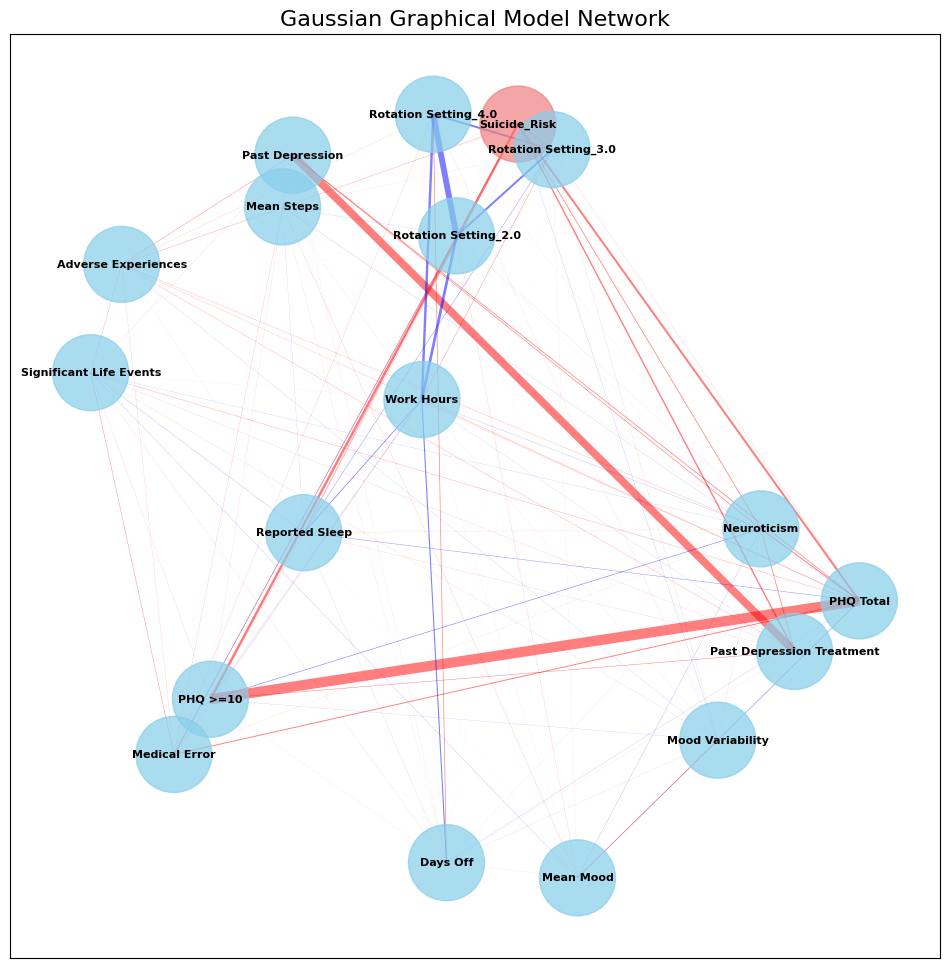

In [93]:
# Step 3: Build and visualize the GGM network with compact layout
G = nx.Graph()

# Add nodes and edges with weights
for i, col1 in enumerate(train_ggm.columns):  # Use train_ggm instead of train_data
    for j, col2 in enumerate(train_ggm.columns):
        if i != j and precision_matrix[i, j] != 0:
            G.add_edge(col1, col2, weight=precision_matrix[i, j])

# Enhanced visualization settings for a compact layout
plt.figure(figsize=(12, 12))

# Use a spring layout with adjusted parameters for compactness
pos = nx.spring_layout(G, seed=42, k=0.8, iterations=50)

# Color nodes by type (e.g., target vs predictors)
node_colors = ['lightcoral' if node == 'Suicide_Risk' else 'skyblue' for node in G.nodes()]

# Get edge weights for display (but won't plot the numbers)
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes
nx.draw_networkx_nodes(
    G, pos, node_color=node_colors, node_size=3000, alpha=0.7
)

# Draw edges with varying transparency based on weight
nx.draw_networkx_edges(
    G, pos, 
    width=[1.5 * abs(w) for w in edge_weights],
    edge_color=['blue' if w > 0 else 'red' for w in edge_weights],
    alpha=0.5
)

# Add node labels (but no edge labels)
nx.draw_networkx_labels(
    G, pos, font_size=8, font_weight='bold', font_color='black'
)

# Title and save
plt.title("Gaussian Graphical Model Network", fontsize=16)
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\compact_network_no_numbers.png'
plt.savefig("ggm_training_network_weighted_REPORTEDSLEEP.png", dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()

Features connected to 'Suicide_Risk': ['Past Depression Treatment', 'PHQ >=10', 'Medical Error', 'Rotation Setting_2.0', 'Rotation Setting_3.0', 'Neuroticism', 'Adverse Experiences', 'PHQ Total', 'Work Hours', 'Days Off', 'Reported Sleep', 'Mean Steps', 'Mood Variability']


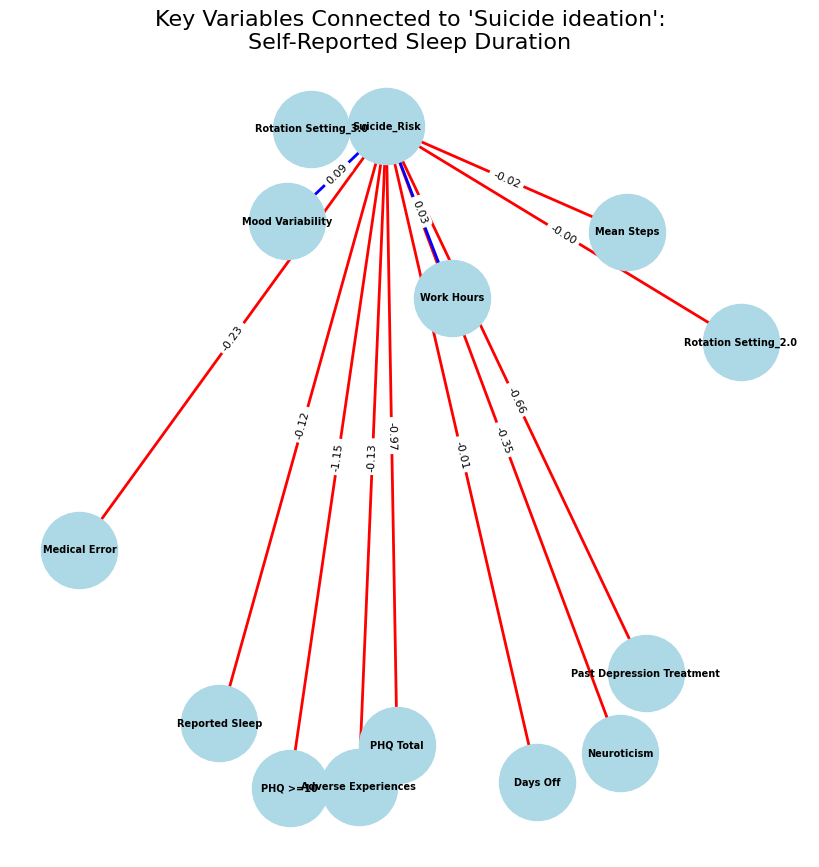

In [94]:
# Step 4: Identify features directly connected to the outcome variable 'Suicide_Risk'
if 'Suicide_Risk' in G.nodes:
    connected_features = [n for n in G.neighbors('Suicide_Risk')]
    print(f"Features connected to 'Suicide_Risk': {connected_features}")
else:
    print("Error: 'Suicide_Risk' is not part of the GGM network.")

# Step 5: Build a subgraph with only 'Suicide_Risk' and its connected nodes
subgraph = nx.Graph()
subgraph.add_node('Suicide_Risk')  # Add the main outcome variable

# Add edges between 'Suicide_Risk' and connected features with weights
for feature in connected_features:
    if G.has_edge('Suicide_Risk', feature):  # Ensure the edge exists
        weight = G['Suicide_Risk'][feature]['weight']  # Get the edge weight
        subgraph.add_edge('Suicide_Risk', feature, weight=weight)  # Add edge

# Step 6: Prepare edge colors based on the sign of the weight
edge_colors = []
for _, _, weight in subgraph.edges(data='weight'):
    if weight > 0:
        edge_colors.append('blue')  # Positive correlations
    else:
        edge_colors.append('red')  # Negative correlations

# Step 7: Visualize the subgraph with color-coded edges
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgraph, seed=42)  # Layout for visualization
nx.draw(
    subgraph, pos, with_labels=True, node_size=3000, font_size=7, font_weight='bold',
    node_color='lightblue', edge_color=edge_colors, width=2
)

# Add edge labels for weights
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(
    subgraph, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()}, font_size=8
)

# Title and save
plt.title("Key Variables Connected to 'Suicide ideation':\nSelf-Reported Sleep Duration", fontsize = 16)
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\sub_graph_Suicide_Risk.png'
plt.savefig('ggm_training_postlasso_REPORTEDSLEEP.png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()


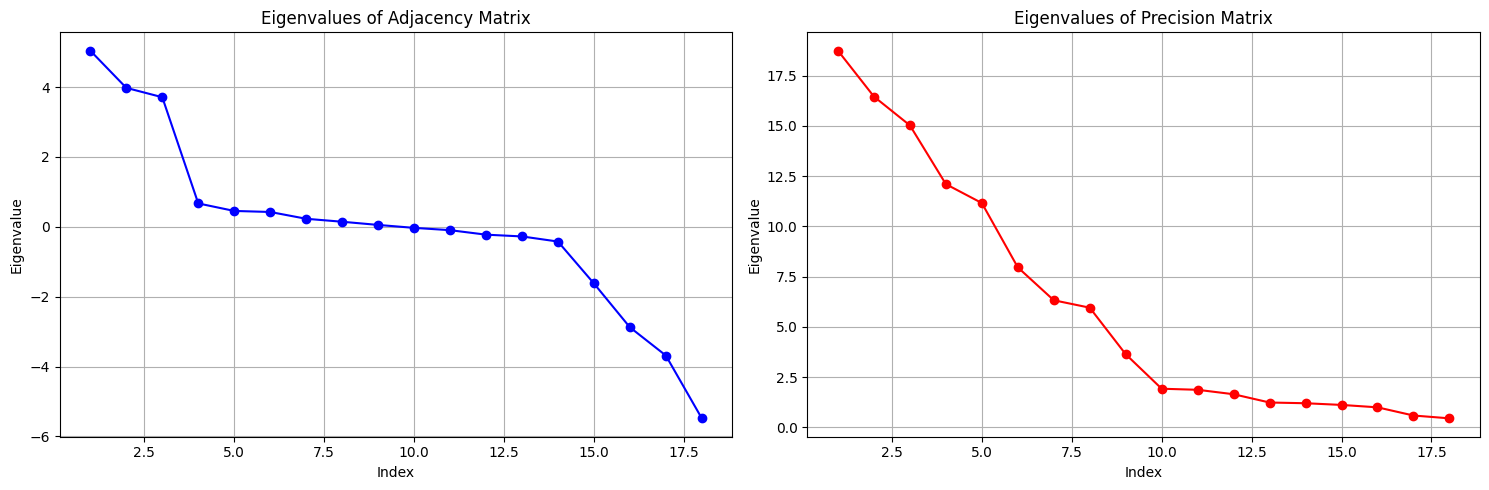


Network Eigenvalue Analysis:
Adjacency Matrix:
  - Largest eigenvalue: 5.0406
  - Smallest eigenvalue: -5.4816
  - Spectral gap: 1.0633

Precision Matrix:
  - Largest eigenvalue: 18.7443
  - Smallest eigenvalue: 0.4511
  - Condition number: 41.5485


In [95]:
# [Previous imports remain the same]
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.covariance import GraphicalLassoCV
from imblearn.over_sampling import SMOTE
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from scipy import linalg

# [Previous code remains the same until after creating the GGM network]

# After creating the GGM network (after Step 4), add:

# Step 4b: Calculate and analyze eigenvalues
def analyze_network_eigenvalues(G, precision_matrix):
    # Get adjacency matrix
    A = nx.adjacency_matrix(G).todense()
    
    # Calculate eigenvalues of adjacency matrix
    adj_eigenvalues = np.linalg.eigvals(A)
    
    # Calculate eigenvalues of precision matrix
    prec_eigenvalues = np.linalg.eigvals(precision_matrix)
    
    # Sort eigenvalues in descending order
    adj_eigenvalues = sorted(adj_eigenvalues.real, reverse=True)
    prec_eigenvalues = sorted(prec_eigenvalues.real, reverse=True)
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot eigenvalues of adjacency matrix
    ax1.plot(range(1, len(adj_eigenvalues) + 1), adj_eigenvalues, 'bo-')
    ax1.set_title('Eigenvalues of Adjacency Matrix')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Eigenvalue')
    ax1.grid(True)
    
    # Plot eigenvalues of precision matrix
    ax2.plot(range(1, len(prec_eigenvalues) + 1), prec_eigenvalues, 'ro-')
    ax2.set_title('Eigenvalues of Precision Matrix')
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Eigenvalue')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('network_eigenvalues_REPORTEDSLEEP.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Calculate and return network metrics
    metrics = {
        'adj_largest_eigenvalue': adj_eigenvalues[0],
        'adj_smallest_eigenvalue': adj_eigenvalues[-1],
        'adj_spectral_gap': adj_eigenvalues[0] - adj_eigenvalues[1],
        'prec_largest_eigenvalue': prec_eigenvalues[0],
        'prec_smallest_eigenvalue': prec_eigenvalues[-1],
        'prec_condition_number': prec_eigenvalues[0] / prec_eigenvalues[-1] if prec_eigenvalues[-1] != 0 else float('inf')
    }
    
    return metrics

# Calculate and print network metrics
network_metrics = analyze_network_eigenvalues(G, precision_matrix)

# Print the results
print("\nNetwork Eigenvalue Analysis:")
print(f"Adjacency Matrix:")
print(f"  - Largest eigenvalue: {network_metrics['adj_largest_eigenvalue']:.4f}")
print(f"  - Smallest eigenvalue: {network_metrics['adj_smallest_eigenvalue']:.4f}")
print(f"  - Spectral gap: {network_metrics['adj_spectral_gap']:.4f}")
print("\nPrecision Matrix:")
print(f"  - Largest eigenvalue: {network_metrics['prec_largest_eigenvalue']:.4f}")
print(f"  - Smallest eigenvalue: {network_metrics['prec_smallest_eigenvalue']:.4f}")
print(f"  - Condition number: {network_metrics['prec_condition_number']:.4f}")

# [Rest of the previous code remains the same]

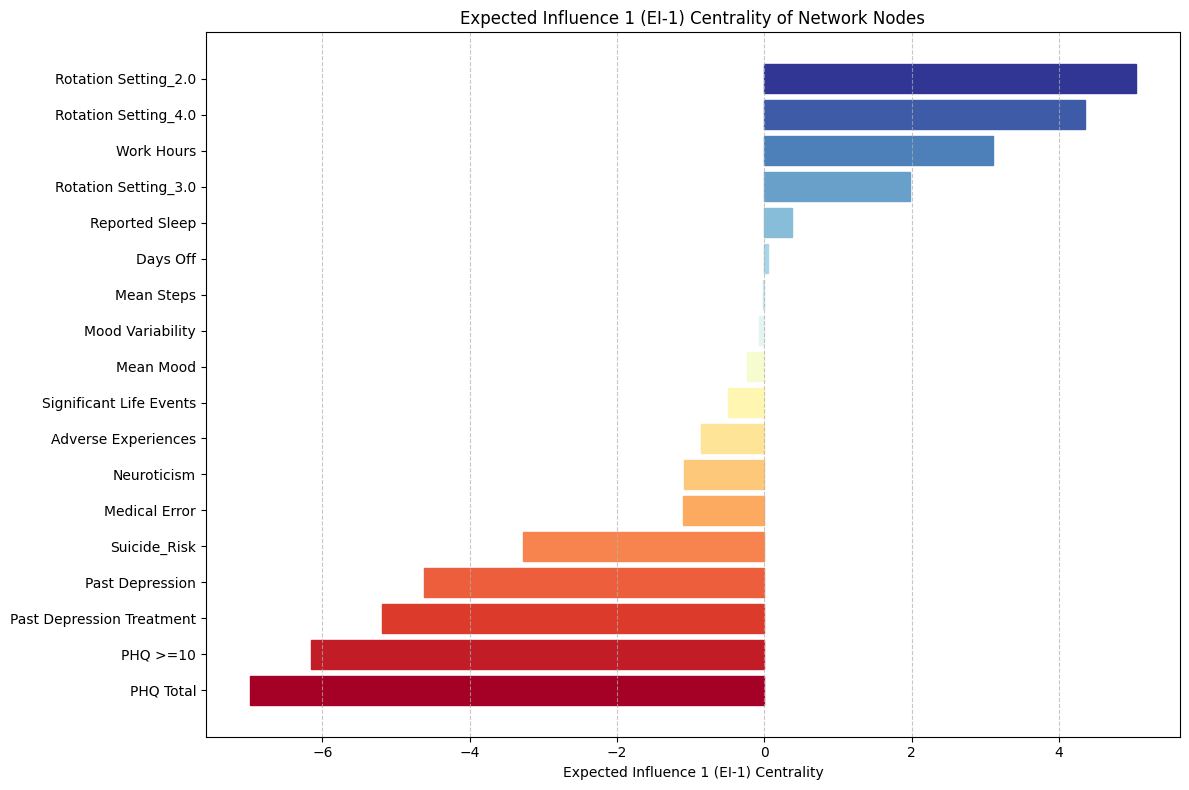


Expected Influence 1 (EI-1) Centrality Scores:
                              EI1
PHQ Total                 -6.9818
PHQ >=10                  -6.1555
Past Depression Treatment -5.1866
Past Depression           -4.6178
Suicide_Risk              -3.2734
Medical Error             -1.0992
Neuroticism               -1.0875
Adverse Experiences       -0.8587
Significant Life Events   -0.4984
Mean Mood                 -0.2404
Mood Variability          -0.0706
Mean Steps                -0.0127
Days Off                   0.0462
Reported Sleep             0.3812
Rotation Setting_3.0       1.9808
Work Hours                 3.0988
Rotation Setting_4.0       4.3563
Rotation Setting_2.0       5.0416


In [96]:
# [Previous imports remain the same]
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.covariance import GraphicalLassoCV
from imblearn.over_sampling import SMOTE
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score
import seaborn as sns

# [Previous code remains the same until after creating the GGM network]

# Add after creating the GGM network (after Step 4):

def calculate_ei1_centrality(G):
    """
    Calculate Expected Influence 1 (EI-1) Centrality for each node in the network.
    EI-1 is the sum of edge weights (including negative weights) connected to each node.
    """
    ei1_centrality = {}
    for node in G.nodes():
        # Sum all edge weights (both positive and negative) for the node
        ei1 = sum(w['weight'] for _, _, w in G.edges(node, data=True))
        ei1_centrality[node] = ei1
    return ei1_centrality

# Calculate EI-1 centrality
ei1_scores = calculate_ei1_centrality(G)

# Convert to DataFrame for easier handling
ei1_df = pd.DataFrame.from_dict(ei1_scores, orient='index', columns=['EI1'])
ei1_df.sort_values('EI1', ascending=True, inplace=True)

# Create visualization
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(ei1_df)), ei1_df['EI1'])
plt.yticks(range(len(ei1_df)), ei1_df.index)
plt.xlabel('Expected Influence 1 (EI-1) Centrality')
plt.title('Expected Influence 1 (EI-1) Centrality of Network Nodes')

# Add color gradient to bars
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('ei1_centrality_REPORTEDSLEEP.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the EI-1 scores
print("\nExpected Influence 1 (EI-1) Centrality Scores:")
print(ei1_df.round(4))


In [97]:
# pip install shap

# Random Forest with all variables  - NO GGM

R^2 for the test set: 0.19

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1080
         1.0       0.56      0.34      0.42       104

    accuracy                           0.92      1184
   macro avg       0.75      0.66      0.69      1184
weighted avg       0.90      0.92      0.91      1184


Confusion Matrix:
[[1052   28]
 [  69   35]]


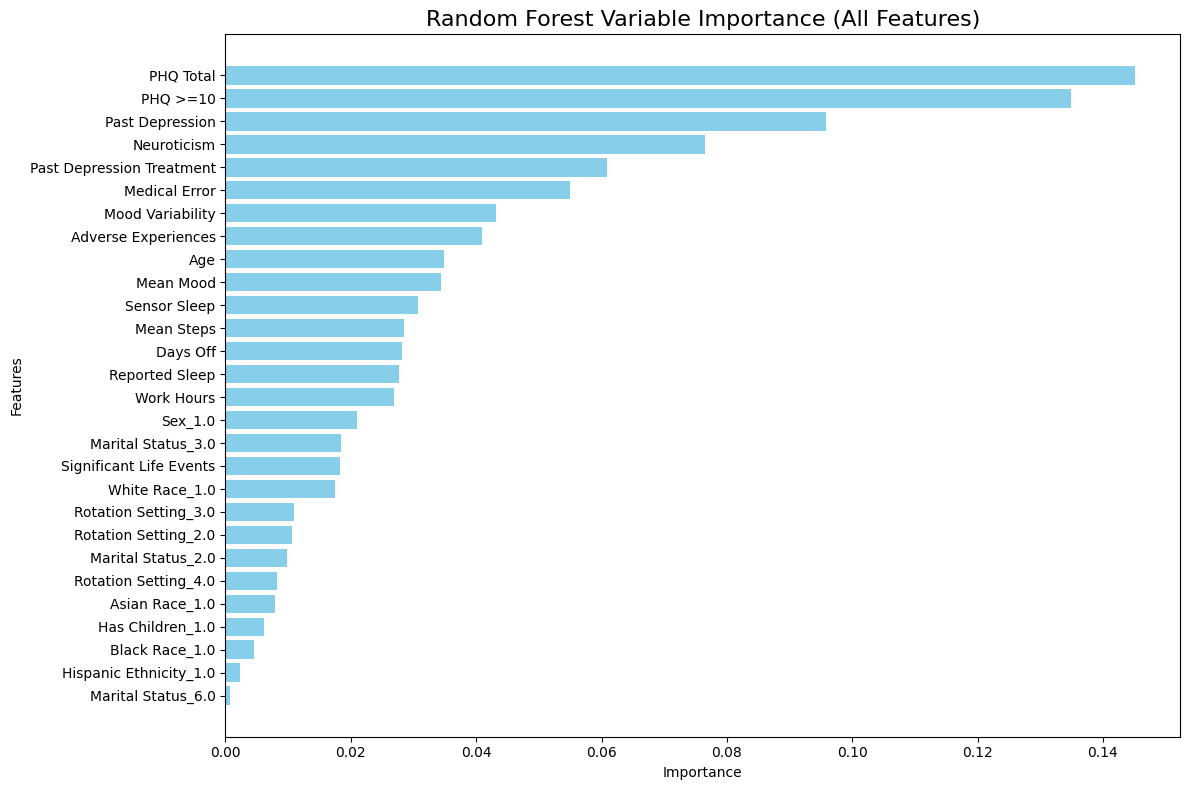


Top 10 Most Important Features:
                      Feature  Importance
20                  PHQ Total      0.1450
2                    PHQ >=10      0.1350
0             Past Depression      0.0958
18                Neuroticism      0.0765
1   Past Depression Treatment      0.0609
3               Medical Error      0.0549
27           Mood Variability      0.0431
19        Adverse Experiences      0.0410
17                        Age      0.0349
25                  Mean Mood      0.0344


In [98]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score

# Define variable groups
demo_vars = ['Sex', 'Has Children', 'White Race', 'Black Race', 'Hispanic Ethnicity', 'Asian Race']
dummy_vars = ['Past Depression', 'Past Depression Treatment', 'PHQ >=10', 'Medical Error', 'Significant Life Events']
categorical_vars = ['Marital Status', 'Rotation Setting']
continuous_vars = ['Age', 'Neuroticism', 'Adverse Experiences', 'PHQ Total', 'Work Hours',
                   'Days Off', 'Reported Sleep', "Sensor Sleep" , 'Mean Mood', 'Mean Steps', 'Mood Variability']

# Step 1: Preprocess the dataset
# Impute missing values for all variables
imputer = SimpleImputer(strategy='most_frequent')
all_categorical = demo_vars + dummy_vars + categorical_vars
sensor_selfreport[all_categorical] = imputer.fit_transform(sensor_selfreport[all_categorical])
sensor_selfreport[continuous_vars] = imputer.fit_transform(sensor_selfreport[continuous_vars])

# One-hot encode non-dummy categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
categorical_to_encode = categorical_vars + [var for var in demo_vars if var not in dummy_vars]
categorical_encoded = encoder.fit_transform(sensor_selfreport[categorical_to_encode])
categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_to_encode))

# Standardize continuous variables
scaler = StandardScaler()
continuous_scaled = scaler.fit_transform(sensor_selfreport[continuous_vars])
continuous_scaled = pd.DataFrame(continuous_scaled, columns=continuous_vars)

# Combine all processed features
processed_data = pd.concat([
    sensor_selfreport[dummy_vars],
    categorical_encoded,
    continuous_scaled
], axis=1)

# Add target variable and quarter
processed_data['Suicide_Risk'] = sensor_selfreport['Suicide_Risk']
processed_data['quarter'] = sensor_selfreport['quarter']

# Remove rows with missing target variable
processed_data = processed_data.dropna(subset=["Suicide_Risk"])

# Step 2: Split data into training and testing sets
train_data = processed_data[processed_data['quarter'].isin([1, 2, 3])].drop(columns=['quarter'])
test_data = processed_data[processed_data['quarter'] == 4].drop(columns=['quarter'])

# Step 3: Prepare features and target
X_train = train_data.drop(columns=['Suicide_Risk'])
y_train = train_data['Suicide_Risk']
X_test = test_data.drop(columns=['Suicide_Risk'])
y_test = test_data['Suicide_Risk']

# Step 4: Balance the Training Data with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Train Random Forest Model
clf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced_subsample',
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=200
)

clf.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the Model
y_prob = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

# Compute R^2
r2 = r2_score(y_test, y_prob)
print(f"R^2 for the test set: {r2:.2f}")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Plot Variable Importance
importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Variable Importance (All Features)', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('rf_variable_importance_all_features.png', dpi=300, bbox_inches='tight')
plt.show()

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(importance_df.head(10).round(4))

In [97]:
# # Step 4: Identify features directly connected to the outcome variable 'ssrs_wish'
# if 'ssrs_wish' in G.nodes:
#     connected_features = [n for n in G.neighbors('ssrs_wish')]
#     print(f"Features connected to 'ssrs_wish': {connected_features}")
# else:
#     print("Error: 'ssrs_wish' is not part of the GGM network.")

# # Step 5: Build a subgraph with only 'ssrs_wish' and its connected nodes
# subgraph = nx.Graph()
# subgraph.add_node('ssrs_wish')  # Add the main outcome variable

# # Add edges between 'ssrs_wish' and connected features with weights
# for feature in connected_features:
#     if G.has_edge('ssrs_wish', feature):  # Ensure the edge exists
#         weight = G['ssrs_wish'][feature]['weight']  # Get the edge weight
#         subgraph.add_edge('ssrs_wish', feature, weight=weight)  # Add edge

# # Step 6: Prepare edge colors based on the sign of the weight
# edge_colors = []
# for _, _, weight in subgraph.edges(data='weight'):
#     if weight > 0:
#         edge_colors.append('blue')  # Positive correlations
#     else:
#         edge_colors.append('red')  # Negative correlations

# # Step 7: Visualize the subgraph with color-coded edges
# plt.figure(figsize=(8, 8))
# pos = nx.spring_layout(subgraph, seed=42)  # Layout for visualization
# nx.draw(
#     subgraph, pos, with_labels=True, node_size=3000, font_size=10, font_weight='bold',
#     node_color='lightblue', edge_color=edge_colors, width=2
# )

# # Add edge labels for weights
# edge_labels = nx.get_edge_attributes(subgraph, 'weight')
# nx.draw_networkx_edge_labels(
#     subgraph, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()}, font_size=8
# )

# # Title and save
# plt.title("Key Variables Connected to 'Suicide ideation': Sleep Var from Sensor", fontsize = 16)
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\sub_graph_ssrs_wish.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save with high resolution
# plt.show()


# Analysis using self reported Data

In [126]:
# # Define categorical and continuous variables
# dummy_vars = ['Sex', 'Child', 'depr0', 'deprTreat0', 'PHQ10above','error1', 'SLE', "White",	"Black", "Hispanic",	"Asian"]
# categorical_vars = ['Marital', 'rotation']
# continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 'sleepAve', 'mean_mood', "mean_step"]

In [98]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.covariance import GraphicalLassoCV
# from imblearn.over_sampling import SMOTE
# import networkx as nx
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import r2_score

# # Step 1: Preprocess the entire dataset
# # Impute missing values
# imputer = SimpleImputer(strategy='most_frequent')
# sensor_selfreport[dummy_vars + categorical_vars] = imputer.fit_transform(sensor_selfreport[dummy_vars + categorical_vars])
# sensor_selfreport[continuous_vars] = imputer.fit_transform(sensor_selfreport[continuous_vars])

# # One-hot encode non-dummy categorical variables
# encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
# categorical_encoded = encoder.fit_transform(sensor_selfreport[categorical_vars])
# categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_vars))

# # Standardize continuous variables
# scaler = StandardScaler()
# continuous_scaled = scaler.fit_transform(sensor_selfreport[continuous_vars])
# continuous_scaled = pd.DataFrame(continuous_scaled, columns=continuous_vars)

# # Combine dummy variables, encoded categorical variables, and scaled continuous variables
# processed_data = pd.concat([sensor_selfreport[dummy_vars], categorical_encoded, continuous_scaled], axis=1)
# processed_data['ssrs_wish'] = sensor_selfreport['ssrs_wish']
# processed_data['quarter'] = sensor_selfreport['quarter']  # Preserve quarter for splitting
# # processed_data = processed_data.dropna(subset=["ssrs_wish"])


# # Step 2: Split data into training (quarters 1, 2, 3) and testing (quarter 4)
# train_data = processed_data[processed_data['quarter'].isin([1, 2, 3])].drop(columns=['quarter'])
# test_data = processed_data[processed_data['quarter'] == 4].drop(columns=['quarter'])

# # Step 3: Run Gaussian Graphical Model (GGM) on training data
# glasso = GraphicalLassoCV()
# glasso.fit(train_data)  # Include the target variable 'ssrs_wish'

# # Extract the best alpha and precision matrix
# best_alpha = glasso.alpha_
# precision_matrix = glasso.precision_
# print(f"Best alpha selected by cross-validation: {best_alpha:.3f}")

# # Step 4: Build and Visualize the GGM Network
# G = nx.Graph()

# # Add nodes and edges
# for i, col1 in enumerate(train_data.columns):
#     for j, col2 in enumerate(train_data.columns):
#         if i != j and precision_matrix[i, j] != 0:
#             G.add_edge(col1, col2, weight=precision_matrix[i, j])

# # Visualize the GGM network
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(
#     G, pos, with_labels=True, node_size=3000, font_size=8, font_weight='bold',
#     node_color='lightblue', edge_color='gray'
# )
# plt.title("Gaussian Graphical Model Network (Training Data)")
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\ggm_training_network.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save with high resolution
# plt.show()

# # Step 5: Feature Selection
# if 'ssrs_wish' in G.nodes:
#     connected_features = [n for n in G.neighbors('ssrs_wish')]
#     print("Features connected to 'ssrs_wish' in the GGM:", connected_features)
# else:
#     raise ValueError("Error: 'ssrs_wish' is not part of the GGM network.")

# # Step 6: Prepare Data for Modeling
# X_train = train_data[connected_features]
# y_train = train_data['ssrs_wish']
# X_test = test_data[connected_features]
# y_test = test_data['ssrs_wish']

# # Step 7: Balance the Training Data with SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Step 8: Train Random Forest Model
# clf = RandomForestClassifier(
#     random_state=42,
#     class_weight='balanced_subsample',
#     max_depth=20,
#     max_features='sqrt',
#     min_samples_leaf=1,
#     min_samples_split=4,
#     n_estimators=200
# )

# clf.fit(X_train_resampled, y_train_resampled)


# # Step 9: Evaluate the Model
# # Predict probabilities for R^2 computation
# y_prob = clf.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
# y_pred = clf.predict(X_test)  # Predicted classes

# # Compute R^2
# r2 = r2_score(y_test, y_prob)
# print(f"R^2 for the test set: {r2:.2f}")

# # Classification report and confusion matrix
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# # Step 10: Plot Variable Importance
# importances = clf.feature_importances_
# importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': importances
# }).sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.title('Variable Importance for Suicide Ideation: Sleep Var from SelfReport', fontsize=16)
# plt.gca().invert_yaxis()  # Most important feature at the top
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\Variable_Importance_2.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save with high resolution
# plt.show()


In [99]:
# # Step 4: Identify features directly connected to the outcome variable 'ssrs_wish'
# if 'ssrs_wish' in G.nodes:
#     connected_features = [n for n in G.neighbors('ssrs_wish')]
#     print(f"Features connected to 'ssrs_wish': {connected_features}")
# else:
#     print("Error: 'ssrs_wish' is not part of the GGM network.")

# # Step 5: Build a subgraph with only 'ssrs_wish' and its connected nodes
# subgraph = nx.Graph()
# subgraph.add_node('ssrs_wish')  # Add the main outcome variable

# # Add edges between 'ssrs_wish' and connected features with weights
# for feature in connected_features:
#     if G.has_edge('ssrs_wish', feature):  # Ensure the edge exists
#         weight = G['ssrs_wish'][feature]['weight']  # Get the edge weight
#         subgraph.add_edge('ssrs_wish', feature, weight=weight)  # Add edge

# # Step 6: Prepare edge colors based on the sign of the weight
# edge_colors = []
# for _, _, weight in subgraph.edges(data='weight'):
#     if weight > 0:
#         edge_colors.append('blue')  # Positive correlations
#     else:
#         edge_colors.append('red')  # Negative correlations

# # Step 7: Visualize the subgraph with color-coded edges
# plt.figure(figsize=(8, 8))
# pos = nx.spring_layout(subgraph, seed=42)  # Layout for visualization
# nx.draw(
#     subgraph, pos, with_labels=True, node_size=3000, font_size=10, font_weight='bold',
#     node_color='lightblue', edge_color=edge_colors, width=2
# )

# # Add edge labels for weights
# edge_labels = nx.get_edge_attributes(subgraph, 'weight')
# nx.draw_networkx_edge_labels(
#     subgraph, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()}, font_size=8
# )

# # Title and save
# plt.title("Key Variables Connected to 'Suicide ideation': Sleep var Self Report", fontsize = 16)
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\sub_graph_ssrs_wish_2.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save with high resolution
# plt.show()


In [226]:
processed_data

,Sex,Child,depr0,deprTreat0,PHQ10above,error1,SLE,White,Black,Hispanic,...,Neu0,EFE0,PHQtot,hours,daysoff,mean_sleep,mean_mood,mean_step,ssrs_wish,quarter


In [191]:
processed_train_data

,Sex,Child,depr0,deprTreat0,PHQ10above,error1,SLE,White,Black,Hispanic,...,Age,Neu0,EFE0,PHQtot,hours,daysoff,mean_sleep,mean_mood,mean_step,ssrs_wish
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.173255,1.332201,-0.430617,0.407694,-0.120275,0.186736,0.373946,-0.630171,0.294424,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.173255,1.332201,-0.430617,1.141987,-3.218541,-0.544242,0.681943,-1.300057,0.323967,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.628668,1.218031,0.627566,2.365808,1.027231,-0.544242,-0.127697,0.087564,-0.132106,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.628668,1.218031,0.627566,0.407694,-1.267780,-0.544242,0.097667,-0.773718,-3.266700,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.173255,0.304675,-0.853891,-0.081834,1.256733,-0.178753,-1.913912,-0.630171,0.322057,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.430591,0.647184,-0.430617,-0.326599,0.166602,-0.544242,0.137732,0.661752,-0.577227,NaN
6296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.628668,1.103862,1.579931,2.610572,1.945236,-1.275220,-2.391349,-1.587151,0.808062,NaN
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.975178,-0.837020,-0.959709,-0.326599,-0.980904,-0.178753,1.182751,1.044544,-0.223812,NaN
6311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.227706,0.076336,-0.853891,-0.571363,-0.120275,-0.544242,-0.396464,1.044544,1.930939,NaN


In [100]:
# print("NaN values in processed_train_data:")
# print(processed_train_data.isnull().sum())


In [101]:
# # Step 3: Build and visualize the GGM network with compact layout
# G = nx.Graph()

# # Add nodes and edges with weights
# for i, col1 in enumerate(train_data.columns):
#     for j, col2 in enumerate(train_data.columns):
#         if i != j and precision_matrix[i, j] != 0:
#             G.add_edge(col1, col2, weight=precision_matrix[i, j])

# # Enhanced visualization settings for a compact layout
# plt.figure(figsize=(12, 12))

# # Use a spring layout with adjusted parameters for compactness
# pos = nx.spring_layout(G, seed=42, k=0.8, iterations=50)

# # Color nodes by type (e.g., target vs predictors)
# node_colors = ['lightcoral' if node == 'ssrs_wish' else 'skyblue' for node in G.nodes()]

# # Get edge weights for display (but won't plot the numbers)
# edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# # Draw nodes
# nx.draw_networkx_nodes(
#     G, pos, node_color=node_colors, node_size=3000, alpha=0.7
# )

# # Draw edges with varying transparency based on weight
# nx.draw_networkx_edges(
#     G, pos, width=[1.5 * abs(w) for w in edge_weights],
#     edge_color=['blue' if w > 0 else 'red' for w in edge_weights],
#     alpha=0.5
# )

# # Add node labels (but no edge labels)
# nx.draw_networkx_labels(
#     G, pos, font_size=8, font_weight='bold', font_color='black'
# )

# # Title and save
# plt.title("Gaussian Graphical Model Network", fontsize=16)
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\compact_network_no_numbers.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save with high resolution
# plt.show()


In [102]:
# # Step 3: Build and visualize the GGM network with compact layout
# G = nx.Graph()

# # Add nodes and edges with weights
# for i, col1 in enumerate(processed_data.columns):
#     for j, col2 in enumerate(processed_data.columns):
#         if i != j and precision_matrix[i, j] != 0:
#             G.add_edge(col1, col2, weight=precision_matrix[i, j])

# # Enhanced visualization settings for a compact layout
# plt.figure(figsize=(12, 12))

# # Use a spring layout with adjusted parameters for compactness
# pos = nx.spring_layout(G, seed=42, k=0.8, iterations=50)

# # Color nodes by type (e.g., target vs predictors)
# node_colors = ['lightcoral' if node == 'ssrs_wish' else 'skyblue' for node in G.nodes()]

# # Get edge weights for display (but won't plot the numbers)
# edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# # Draw nodes
# nx.draw_networkx_nodes(
#     G, pos, node_color=node_colors, node_size=3000, alpha=0.7
# )

# # Draw edges with varying transparency based on weight
# nx.draw_networkx_edges(
#     G, pos, width=[1.5 * abs(w) for w in edge_weights],
#     edge_color=['blue' if w > 0 else 'red' for w in edge_weights],
#     alpha=0.5
# )

# # Add node labels (but no edge labels)
# nx.draw_networkx_labels(
#     G, pos, font_size=8, font_weight='bold', font_color='black'
# )

# # Title and save
# plt.title("Gaussian Graphical Model Network", fontsize=16)
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\compact_network_no_numbers.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save with high resolution
# plt.show()



In [182]:
processed_data

,Sex,Child,depr0,deprTreat0,PHQ10above,error1,SLE,White,Black,Hispanic,...,Age,Neu0,EFE0,PHQtot,hours,daysoff,mean_sleep,mean_mood,mean_step,ssrs_wish
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.164956,1.330680,-0.428619,0.417716,-0.079490,0.170026,0.382184,-0.554375,0.294922,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.164956,1.330680,-0.428619,1.147509,-3.127718,-0.543668,0.684183,-1.208234,0.324062,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.630909,1.216785,0.631890,2.363831,1.049483,-0.543668,-0.109691,0.146188,-0.125804,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.630909,1.216785,0.631890,0.417716,-1.208463,-0.543668,0.111284,-0.694488,-3.217740,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.164956,0.305624,-0.852823,-0.068812,1.275278,-0.186821,-1.861125,-0.554375,0.322179,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7729,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.358755,-0.719432,-0.746772,0.904245,0.597894,-0.543668,-1.959336,-0.460967,-2.385937,0.0
7730,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.028842,1.330680,0.843992,1.390774,1.331727,-0.543668,0.895337,1.594018,0.217728,0.0
7731,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-1.028842,1.330680,0.843992,1.390774,0.964810,-0.900514,0.727560,1.313793,0.242255,0.0
7732,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.028842,1.330680,0.843992,0.417716,0.597894,-0.186821,1.014009,1.033567,-0.270121,0.0


In [103]:
# # Step 4: Feature selection using GGM
# if 'ssrs_wish' in G.nodes:
#     connected_features = [n for n in G.neighbors('ssrs_wish')]
#     print("Features connected to 'ssrs_wish' in the GGM:", connected_features)
# else:
#     print("Error: 'ssrs_wish' is not part of the GGM network. Ensure it is included in processed_data.")

# # Subset data for predictive modeling
# X_selected = processed_data[connected_features]

# # Remove 'ssrs_wish' from processed_data for balancing
# processed_data = processed_data.drop(columns=['ssrs_wish'])

# # Step 5: Train-test split using the quarter variable
# # Separate data into training (quarters 1, 2, 3) and testing (quarter 4)
# train_data = sensor_selfreport[sensor_selfreport['quarter'].isin([1, 2, 3])]
# test_data = sensor_selfreport[sensor_selfreport['quarter'] == 4]

# # Create training and testing sets
# X_train = train_data[connected_features]
# y_train = train_data['ssrs_wish']
# X_test = test_data[connected_features]
# y_test = test_data['ssrs_wish']

# # Step 6: Balance the training dataset using SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Step 7: Train a predictive model using Random Forest
# clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# clf.fit(X_train_resampled, y_train_resampled)

# # Step 8: Evaluate the model
# y_pred = clf.predict(X_test)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# # Step 9: Plot Variable Importance
# importances = clf.feature_importances_
# importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': importances
# }).sort_values(by='Importance', ascending=False)

# # Plot the variable importance
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.title('Variable Importance for Suicide Ideation', fontsize=16)
# plt.gca().invert_yaxis()  # Most important feature at the top
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\Variable_Importance.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save with high resolution
# plt.show()


In [ ]:
# connected_features

['Sex',
 'Child',
 'deprTreat0',
 'PHQ10above',
 'error1',
 'SLE',
 'White',
 'rotation_2.0',
 'rotation_3.0',
 'Age',
 'Neu0',
 'EFE0',
 'PHQtot',
 'hours',
 'daysoff',
 'mean_sleep',
 'mean_mood',
 'mean_step']

In [104]:
# # Step 4: Identify features directly connected to the outcome variable 'ssrs_wish'
# if 'ssrs_wish' in G.nodes:
#     connected_features = [n for n in G.neighbors('ssrs_wish')]
#     print(f"Features connected to 'ssrs_wish': {connected_features}")
# else:
#     print("Error: 'ssrs_wish' is not part of the GGM network.")

# # Step 5: Build a subgraph with only 'ssrs_wish' and its connected nodes
# subgraph = nx.Graph()
# subgraph.add_node('ssrs_wish')  # Add the main outcome variable

# # Add edges between 'ssrs_wish' and connected features with weights
# for feature in connected_features:
#     if G.has_edge('ssrs_wish', feature):  # Ensure the edge exists
#         weight = G['ssrs_wish'][feature]['weight']  # Get the edge weight
#         subgraph.add_edge('ssrs_wish', feature, weight=weight)  # Add edge

# # Step 6: Prepare edge colors based on the sign of the weight
# edge_colors = []
# for _, _, weight in subgraph.edges(data='weight'):
#     if weight > 0:
#         edge_colors.append('blue')  # Positive correlations
#     else:
#         edge_colors.append('red')  # Negative correlations

# # Step 7: Visualize the subgraph with color-coded edges
# plt.figure(figsize=(8, 8))
# pos = nx.spring_layout(subgraph, seed=42)  # Layout for visualization
# nx.draw(
#     subgraph, pos, with_labels=True, node_size=3000, font_size=10, font_weight='bold',
#     node_color='lightblue', edge_color=edge_colors, width=2
# )

# # Add edge labels for weights
# edge_labels = nx.get_edge_attributes(subgraph, 'weight')
# nx.draw_networkx_edge_labels(
#     subgraph, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()}, font_size=8
# )

# # Title and save
# plt.title("Key Variables Connected to 'Suicide ideation': Color-Coded Correlation Network", fontsize = 16)
# output_path = r'C:\Users\Alexander\Documents\GitHub\PassiveSensing-Symptoms-NetworkAnalysis\output\sub_graph_ssrs_wish.png'
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save with high resolution
# plt.show()


In [105]:
# # Step 4: Feature selection using GGM
# if 'ssrs_wish' in G.nodes:
#     connected_features = [n for n in G.neighbors('ssrs_wish')]
#     print("Features connected to 'ssrs_wish' in the GGM:", connected_features)
# else:
#     print("Error: 'ssrs_wish' is not part of the GGM network. Ensure it is included in processed_data.")

# # Subset data for predictive modeling
# X_selected = processed_data[connected_features]

# # Remove 'ssrs_wish' from processed_data for balancing
# processed_data = processed_data.drop(columns=['ssrs_wish'])

# # Step 5: Balance the dataset using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# # Step 6: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# # Step 7: Train a predictive model using Random Forest
# clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# clf.fit(X_train, y_train)

# # Step 8: Evaluate the model
# y_pred = clf.predict(X_test)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [ ]:
# 

In [106]:
# # network analysis for feature selcetion 
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.covariance import GraphicalLassoCV
# from imblearn.over_sampling import SMOTE
# import networkx as nx
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix

# # Load your dataset (assuming sensor_selfreport.csv is already loaded as a DataFrame)
# # sensor_selfreport = pd.read_csv('path_to_your_data.csv')

# # Separate variables
# # categorical_vars = ['Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity_rec', 
# #                     'depr0', 'deprTreat0', 'PHQ10above', 'SLE', 'rotation', 'error1']

# categorical_vars = ['Sex', 'Marital', 'Child', 'Ethnicity_rec', 
#                     'depr0', 'deprTreat0', 'PHQ10above', 'SLE', 'rotation', 'error1', "ssrs_wish"]
                    
# # continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 'sleep24h', 'sleepAve']
# continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 'mean_sleep', 'mean_mood', "mean_step"]


# # Step 1: Preprocessing
# # Impute missing values
# imputer = SimpleImputer(strategy='most_frequent')
# sensor_selfreport[categorical_vars] = imputer.fit_transform(sensor_selfreport[categorical_vars])
# sensor_selfreport[continuous_vars] = imputer.fit_transform(sensor_selfreport[continuous_vars])

# # One-hot encode categorical variables
# encoder = OneHotEncoder(sparse_output=False, drop='first')
# categorical_encoded = encoder.fit_transform(sensor_selfreport[categorical_vars])
# categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_vars))

# # Standardize continuous variables
# scaler = StandardScaler()
# continuous_scaled = scaler.fit_transform(sensor_selfreport[continuous_vars])
# continuous_scaled = pd.DataFrame(continuous_scaled, columns=continuous_vars)

# # Combine encoded categorical and scaled continuous variables
# processed_data = pd.concat([categorical_encoded, pd.DataFrame(continuous_scaled)], axis=1)

# # Extract the target variable
# y = sensor_selfreport['ssrs_wish']
# # Ensure processed_data does not include ssrs_wish
# X = processed_data.copy()


# # Step 2: Balancing the Dataset Using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Step 3: Gaussian Graphical Model (GGM)
# glasso = GraphicalLassoCV()
# glasso.fit(X_resampled)

# # Extract precision matrix
# precision_matrix = glasso.precision_

# # Step 4: Build and visualize the network
# G = nx.Graph()

# # Add nodes
# for col in X_resampled.columns:
#     G.add_node(col)

# # Add edges with weights
# for i, col1 in enumerate(X_resampled.columns):
#     for j, col2 in enumerate(X_resampled.columns):
#         if i != j and precision_matrix[i, j] != 0:
#             G.add_edge(col1, col2, weight=precision_matrix[i, j])

# # Plot the network
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, font_weight='bold', 
#         node_color='lightblue', edge_color='gray')
# plt.title("Gaussian Graphical Model Network")
# plt.show()

# # Step 5: Use Selected Features for Predictive Modeling
# # Identify features connected to ssrs_wish
# connected_features = [n for n in G.neighbors('ssrs_wish')]

# # Subset the data for modeling
# X_selected = X_resampled[connected_features]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=42)

# # Train a Random Forest model
# clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = clf.predict(X_test)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [107]:
# # Step 1: Include ssrs_wish in processed_data for GGM
# processed_data['ssrs_wish'] = sensor_selfreport['ssrs_wish']

# # Step 2: Gaussian Graphical Model (GGM)
# glasso = GraphicalLassoCV()
# glasso.fit(processed_data)

# # Extract precision matrix
# precision_matrix = glasso.precision_

# # Step 3: Build and visualize the network
# G = nx.Graph()

# # Add nodes
# for col in processed_data.columns:
#     G.add_node(col)

# # Add edges with weights
# for i, col1 in enumerate(processed_data.columns):
#     for j, col2 in enumerate(processed_data.columns):
#         if i != j and precision_matrix[i, j] != 0:
#             G.add_edge(col1, col2, weight=precision_matrix[i, j])

# # Plot the network
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, font_weight='bold', 
#         node_color='lightblue', edge_color='gray')
# plt.title("Gaussian Graphical Model Network")
# plt.show()

# # Step 4: Identify features connected to ssrs_wish
# if 'ssrs_wish' in G.nodes:
#     connected_features = [n for n in G.neighbors('ssrs_wish')]
#     print("Features connected to ssrs_wish in the GGM:", connected_features)
# else:
#     print("ssrs_wish is not part of the GGM network. Ensure it is included in processed_data.")

# # Step 5: Subset data and prepare for modeling
# if 'ssrs_wish' in processed_data.columns:
#     processed_data = processed_data.drop(columns=['ssrs_wish'])

# # Step 6: Balancing the dataset using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(processed_data, y)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# # Train a Random Forest model
# clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = clf.predict(X_test)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [108]:
# 

In [109]:
# 

In [110]:
# 

In [111]:
# 

In [112]:
# 

In [113]:
# 

In [114]:
# 

In [115]:
# 

In [116]:
# sensor_selfreport.Marital.hist()
# ,

In [117]:
!pip install scikit-learn
!pip install networkx
!pip install imbalanced-learn



Error processing line 7 of C:\Users\Alexander\anaconda3\envs\did_test\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\Alexander\anaconda3\envs\did_test\lib\site.py", line 177, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


Error processing line 7 of C:\Users\Alexander\anaconda3\envs\did_test\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\Alexander\anaconda3\envs\did_test\lib\site.py", line 177, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


Error processing line 7 of C:\Users\Alexander\anaconda3\envs\did_test\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\Alexander\anaconda3\envs\did_test\lib\site.py", line 177, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [118]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.covariance import GraphicalLassoCV
# import networkx as nx
# import matplotlib.pyplot as plt

# # Load your dataset (assuming sensor_selfreport.csv is already loaded as a DataFrame)
# # sensor_selfreport = pd.read_csv('path_to_your_data.csv')

# # Separate variables
# # categorical_vars = ['Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity_rec', 
# #                     'depr0', 'deprTreat0', 'PHQ10above', 'SLE', 'rotation', 'error1', "ssrs_wish"]

# categorical_vars = ['Sex', 'Marital', 'Child', 'Ethnicity_rec', 
#                     'depr0', 'deprTreat0', 'PHQ10above', 'SLE', 'rotation', 'error1', "ssrs_wish"]

# # continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 'sleep24h', 'sleepAve']
# continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 'mean_sleep', 'mean_mood', "mean_step"]


# # Step 1: Preprocessing
# # Impute missing values
# imputer = SimpleImputer(strategy='most_frequent')
# sensor_selfreport[categorical_vars] = imputer.fit_transform(sensor_selfreport[categorical_vars])
# sensor_selfreport[continuous_vars] = imputer.fit_transform(sensor_selfreport[continuous_vars])

# # One-hot encode categorical variables
# encoder = OneHotEncoder(sparse_output=False, drop='first')
# categorical_encoded = encoder.fit_transform(sensor_selfreport[categorical_vars])
# categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_vars))


# # Standardize continuous variables
# scaler = StandardScaler()
# continuous_scaled = scaler.fit_transform(sensor_selfreport[continuous_vars])
# continuous_scaled = pd.DataFrame(continuous_scaled, columns=continuous_vars)

# # Combine encoded categorical and scaled continuous variables
# processed_data = pd.concat([categorical_encoded, pd.DataFrame(continuous_scaled)], axis=1)

# # Step 2: Gaussian Graphical Model (GGM)
# glasso = GraphicalLassoCV()
# glasso.fit(processed_data)

# # Extract precision matrix
# precision_matrix = glasso.precision_

# # Step 3: Build and visualize the network
# G = nx.Graph()

# # Add nodes
# for col in processed_data.columns:
#     G.add_node(col)

# # Add edges with weights
# for i, col1 in enumerate(processed_data.columns):
#     for j, col2 in enumerate(processed_data.columns):
#         if i != j and precision_matrix[i, j] != 0:
#             G.add_edge(col1, col2, weight=precision_matrix[i, j])

# # Plot the network
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, font_weight='bold', 
#         node_color='lightblue', edge_color='gray')
# plt.title("Gaussian Graphical Model Network")
# plt.show()

# # Step 4: Key insights
# print("Top variables linked to the outcome ssrs_wish (not directly shown in GGM):")
# # Add specific variable analysis or importance ranking from your dataset


<Axes: >

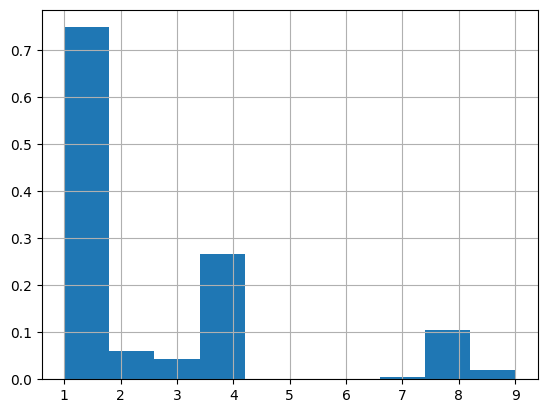

In [119]:
sensor_selfreport.Ethnicity.hist(density=True)

In [120]:
# # network analysis for feature selcetion 
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.covariance import GraphicalLassoCV
# from imblearn.over_sampling import SMOTE
# import networkx as nx
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix

# # Load your dataset (assuming sensor_selfreport.csv is already loaded as a DataFrame)
# # sensor_selfreport = pd.read_csv('path_to_your_data.csv')

# # Separate variables
# # categorical_vars = ['Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity_rec', 
# #                     'depr0', 'deprTreat0', 'PHQ10above', 'SLE', 'rotation', 'error1']

# categorical_vars = ['Sex', 'Marital', 'Child', 'Ethnicity_rec', 
#                     'depr0', 'deprTreat0', 'PHQ10above', 'SLE', 'rotation', 'error1', "ssrs_wish"]
                    
# # continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 'sleep24h', 'sleepAve']
# continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 'mean_sleep', 'mean_mood', "mean_step"]


# # Step 1: Preprocessing
# # Impute missing values
# imputer = SimpleImputer(strategy='most_frequent')
# sensor_selfreport[categorical_vars] = imputer.fit_transform(sensor_selfreport[categorical_vars])
# sensor_selfreport[continuous_vars] = imputer.fit_transform(sensor_selfreport[continuous_vars])

# # One-hot encode categorical variables
# encoder = OneHotEncoder(sparse_output=False, drop='first')
# categorical_encoded = encoder.fit_transform(sensor_selfreport[categorical_vars])
# categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_vars))

# # Standardize continuous variables
# scaler = StandardScaler()
# continuous_scaled = scaler.fit_transform(sensor_selfreport[continuous_vars])
# continuous_scaled = pd.DataFrame(continuous_scaled, columns=continuous_vars)

# # Combine encoded categorical and scaled continuous variables
# processed_data = pd.concat([categorical_encoded, pd.DataFrame(continuous_scaled)], axis=1)

# # Extract the target variable
# y = sensor_selfreport['ssrs_wish']
# # Ensure processed_data does not include ssrs_wish
# X = processed_data.copy()


# # Step 2: Balancing the Dataset Using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Step 3: Gaussian Graphical Model (GGM)
# glasso = GraphicalLassoCV()
# glasso.fit(X_resampled)

# # Extract precision matrix
# precision_matrix = glasso.precision_

# # Step 4: Build and visualize the network
# G = nx.Graph()

# # Add nodes
# for col in X_resampled.columns:
#     G.add_node(col)

# # Add edges with weights
# for i, col1 in enumerate(X_resampled.columns):
#     for j, col2 in enumerate(X_resampled.columns):
#         if i != j and precision_matrix[i, j] != 0:
#             G.add_edge(col1, col2, weight=precision_matrix[i, j])

# # Plot the network
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, font_weight='bold', 
#         node_color='lightblue', edge_color='gray')
# plt.title("Gaussian Graphical Model Network")
# plt.show()

# # Step 5: Use Selected Features for Predictive Modeling
# # Identify features connected to ssrs_wish
# connected_features = [n for n in G.neighbors('ssrs_wish')]

# # Subset the data for modeling
# X_selected = X_resampled[connected_features]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=42)

# # Train a Random Forest model
# clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = clf.predict(X_test)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


In [121]:
# # Step 1: Include ssrs_wish in processed_data for GGM
# processed_data['ssrs_wish'] = sensor_selfreport['ssrs_wish']

# # Step 2: Gaussian Graphical Model (GGM)
# glasso = GraphicalLassoCV()
# glasso.fit(processed_data)

# # Extract precision matrix
# precision_matrix = glasso.precision_

# # Step 3: Build and visualize the network
# G = nx.Graph()

# # Add nodes
# for col in processed_data.columns:
#     G.add_node(col)

# # Add edges with weights
# for i, col1 in enumerate(processed_data.columns):
#     for j, col2 in enumerate(processed_data.columns):
#         if i != j and precision_matrix[i, j] != 0:
#             G.add_edge(col1, col2, weight=precision_matrix[i, j])

# # Plot the network
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, font_weight='bold', 
#         node_color='lightblue', edge_color='gray')
# plt.title("Gaussian Graphical Model Network")
# plt.show()

# # Step 4: Identify features connected to ssrs_wish
# if 'ssrs_wish' in G.nodes:
#     connected_features = [n for n in G.neighbors('ssrs_wish')]
#     print("Features connected to ssrs_wish in the GGM:", connected_features)
# else:
#     print("ssrs_wish is not part of the GGM network. Ensure it is included in processed_data.")

# # Step 5: Subset data and prepare for modeling
# if 'ssrs_wish' in processed_data.columns:
#     processed_data = processed_data.drop(columns=['ssrs_wish'])

# # Step 6: Balancing the dataset using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(processed_data, y)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# # Train a Random Forest model
# clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# clf.fit(X_train, y_train)

# # Evaluate the model
# y_pred = clf.predict(X_test)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


In [122]:
# connected_features

In [123]:
# # Step 1: Include ssrs_wish in processed_data for GGM
# processed_data['ssrs_wish'] = sensor_selfreport['ssrs_wish']
# processed_data.ssrs_wish.hist()

In [124]:
# import pandas as pd
# import numpy as np
# from sklearn.covariance import GraphicalLassoCV
# import networkx as nx
# import matplotlib.pyplot as plt

# # Example: Gaussian Graphical Model
# # Assuming processed_data is your data for GGM
# # Create the Graphical Lasso Model
# glasso = GraphicalLassoCV()
# glasso.fit(processed_data)

# # Extract precision matrix and build a network
# precision_matrix = glasso.precision_
# G = nx.Graph()

# # Add nodes and edges with weights
# for i, col1 in enumerate(processed_data.columns):
#     for j, col2 in enumerate(processed_data.columns):
#         if i != j and precision_matrix[i, j] != 0:
#             G.add_edge(col1, col2, weight=precision_matrix[i, j])

# # Calculate Expected Influence (EI) Centrality
# # EI = sum of the edge weights connected to each node
# ei_centrality = {}
# for node in G.nodes:
#     ei_centrality[node] = sum(weight for _, _, weight in G.edges(node, data="weight"))

# # Sort nodes by EI centrality
# sorted_ei = sorted(ei_centrality.items(), key=lambda x: x[1], reverse=True)
# nodes, centrality_values = zip(*sorted_ei)

# # Plot Expected Influence (EI) Centrality
# plt.figure(figsize=(8, 10))
# plt.barh(nodes, centrality_values, color="black", alpha=0.7)
# plt.xlabel("Expected Influence (EI) Centrality")
# plt.ylabel("Variables")
# plt.title("Expected Influence (EI) Centrality of Variables")
# plt.gca().invert_yaxis()  # Invert y-axis for a similar display
# plt.show()


In [125]:
# processed_data